In [1]:
import pandas as pd
df = pd.read_csv('aus.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [2]:
# Basic statistics for numerical columns to check for outliers
numerical_stats = df.describe()
numerical_stats

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

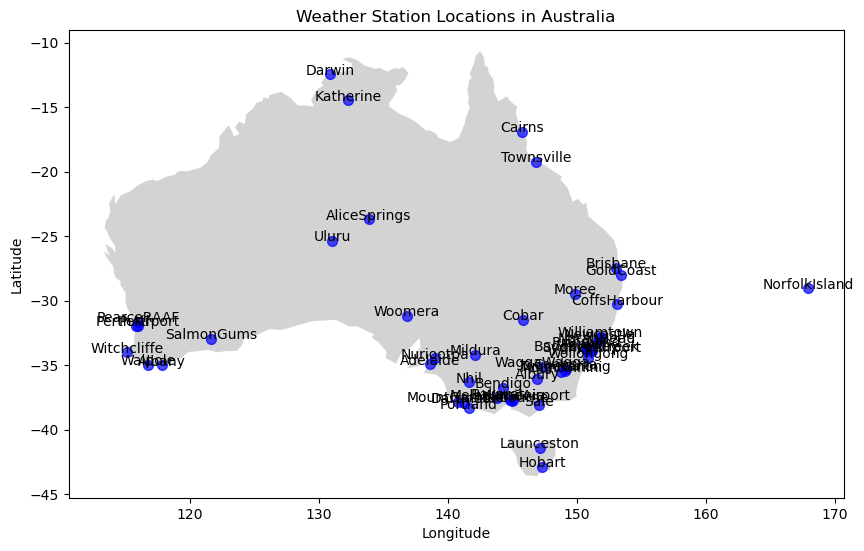

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='blue', alpha=0.7)

# Add labels for each location
for idx, row in gdf.iterrows():
    ax.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=10, ha='center')

# Set title and axis labels
ax.set_title('Weather Station Locations in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [4]:
# Calculate summary statistics for rainfall by location
rainfall_by_location = df.groupby('Location')['Rainfall'].agg(['mean', 'median', 'std', 'count']).reset_index()
rainfall_by_location.sort_values(by='mean', ascending=False, inplace=True)

# Display summary statistics
rainfall_by_location.head()

Location      mean  median        std  count
8         Cairns  5.742035     0.0  18.280975   2988
13        Darwin  5.092452     0.0  16.450148   3193
11  CoffsHarbour  5.061497     0.0  17.444480   2953
14     GoldCoast  3.769396     0.0  13.054984   2980
47    Wollongong  3.594903     0.0  11.897181   2982

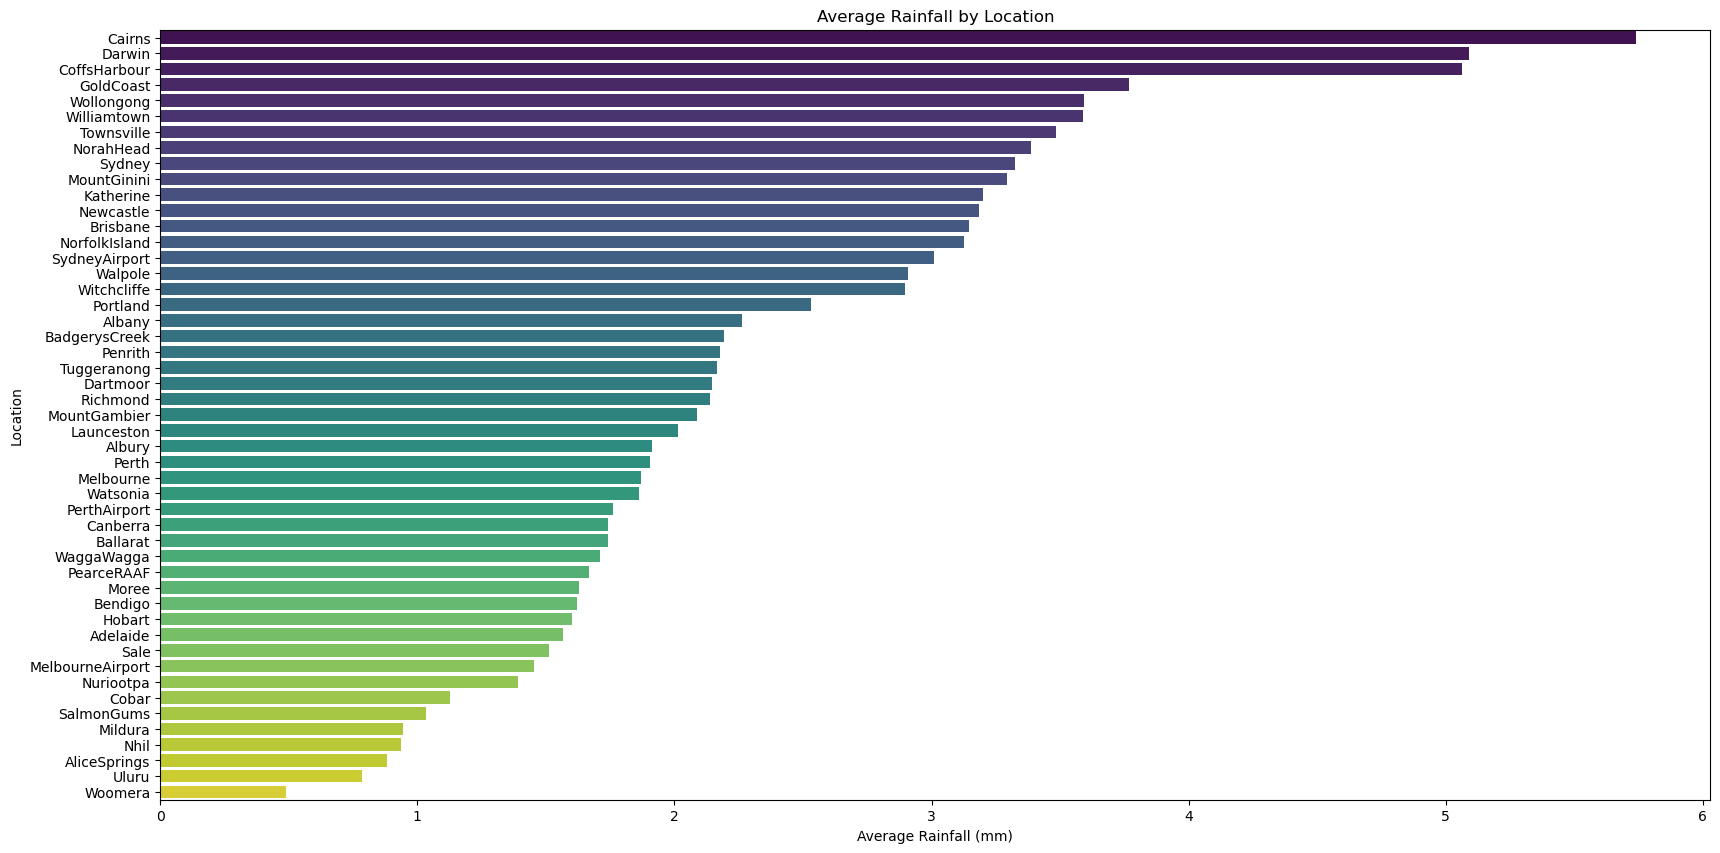

In [5]:
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a bar chart for average rainfall by location
sns.barplot(x='mean', y='Location', data=rainfall_by_location, palette='viridis')

# Add labels and title
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Location')
plt.title('Average Rainfall by Location')

# Show the plot
plt.show()

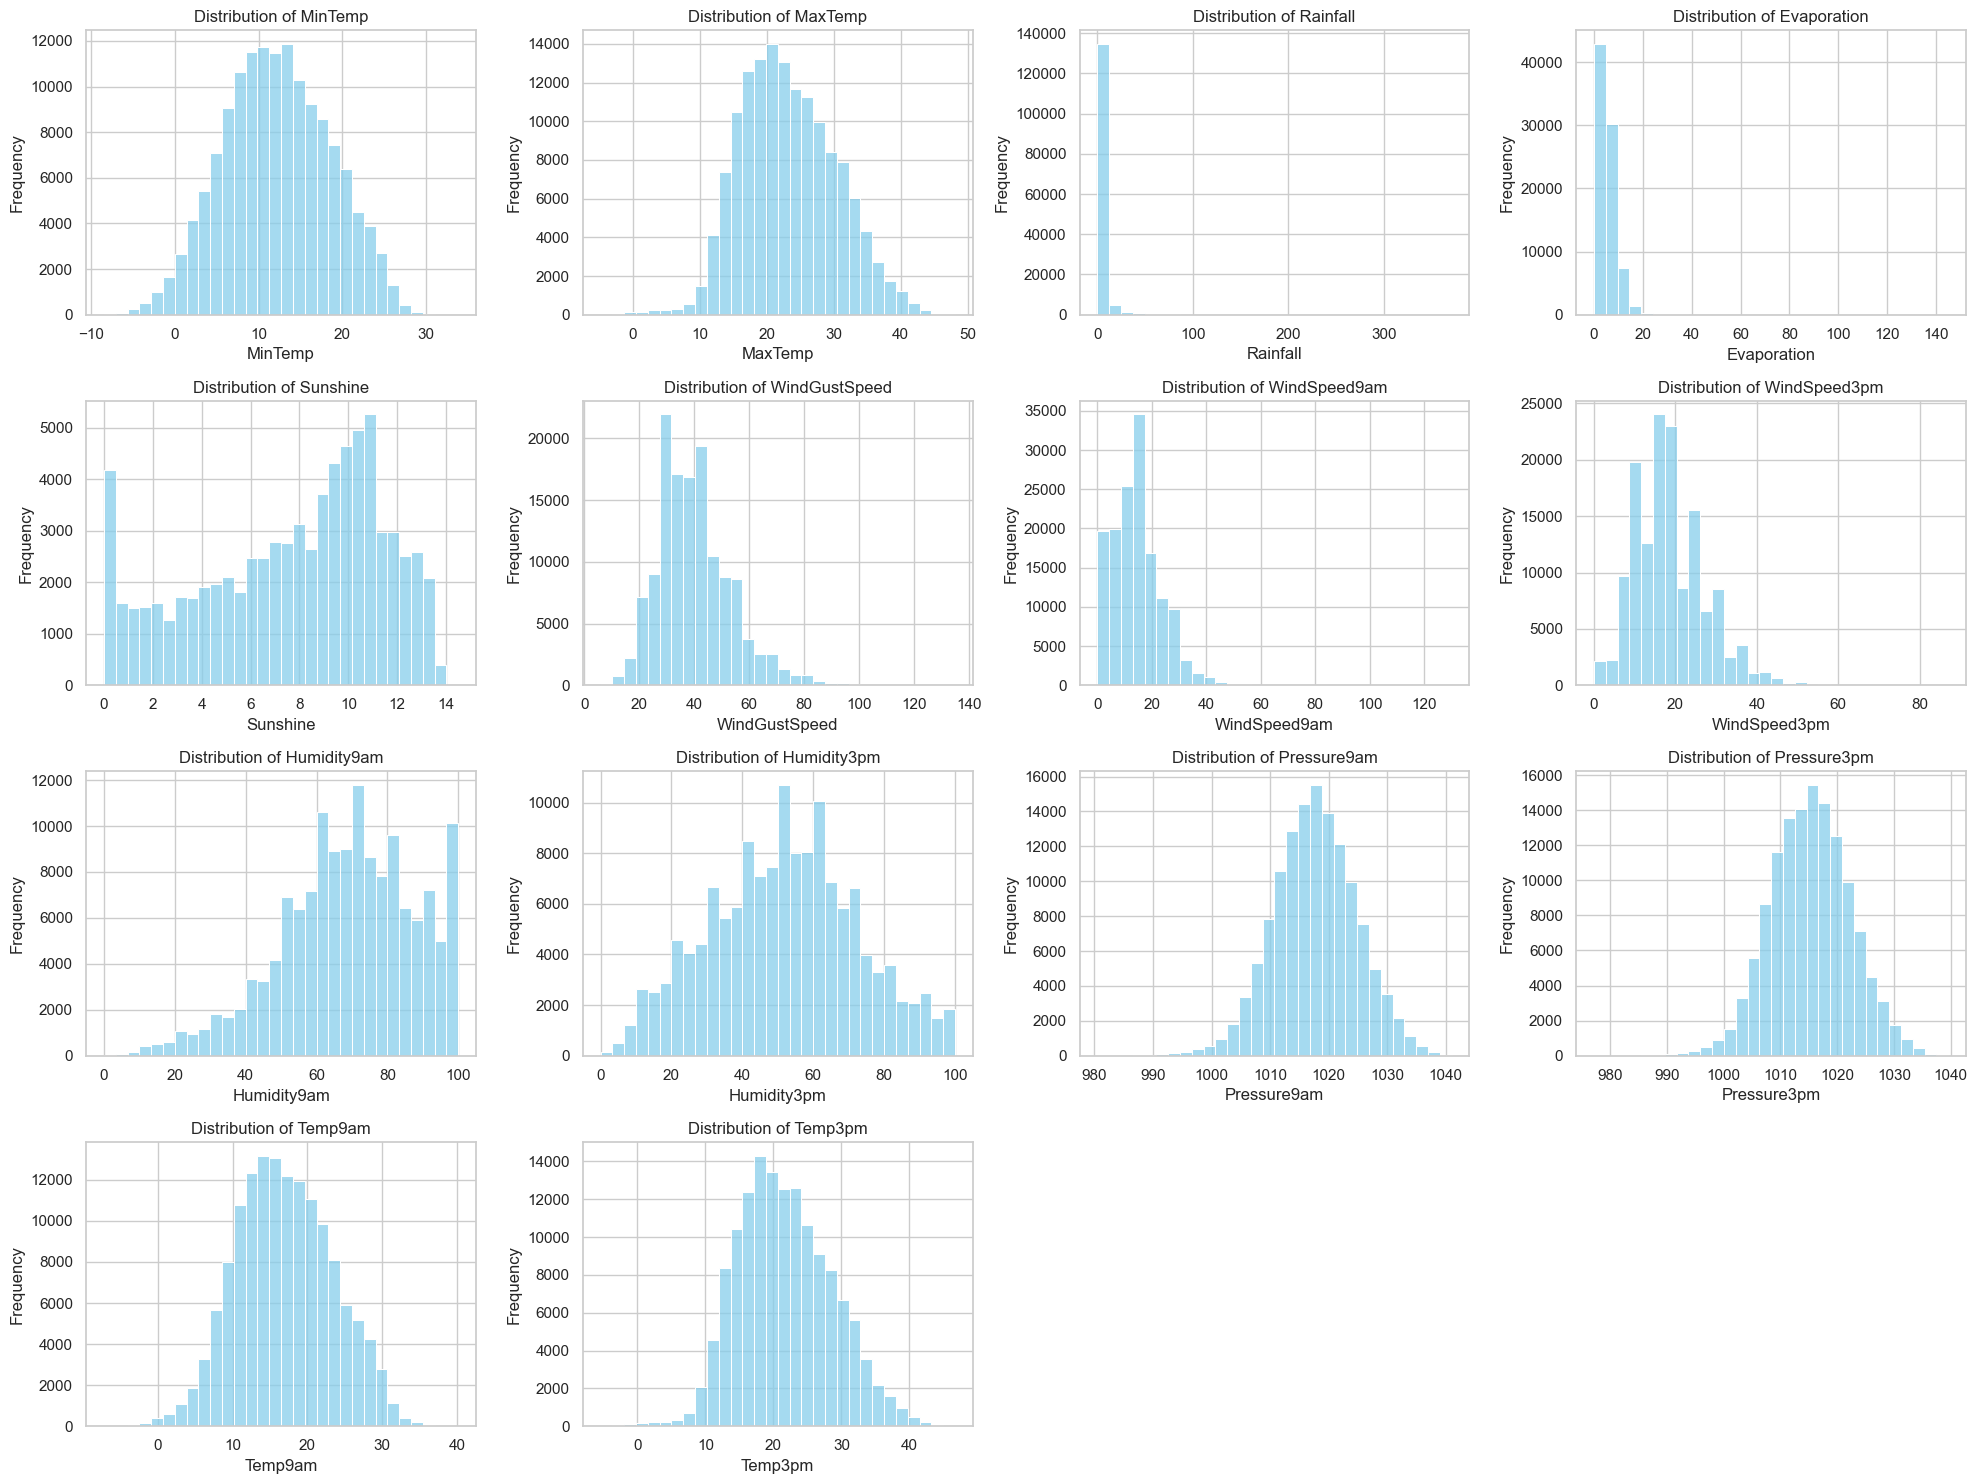

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                     'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 
                     'Temp9am', 'Temp3pm']

# Create subplots for each column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

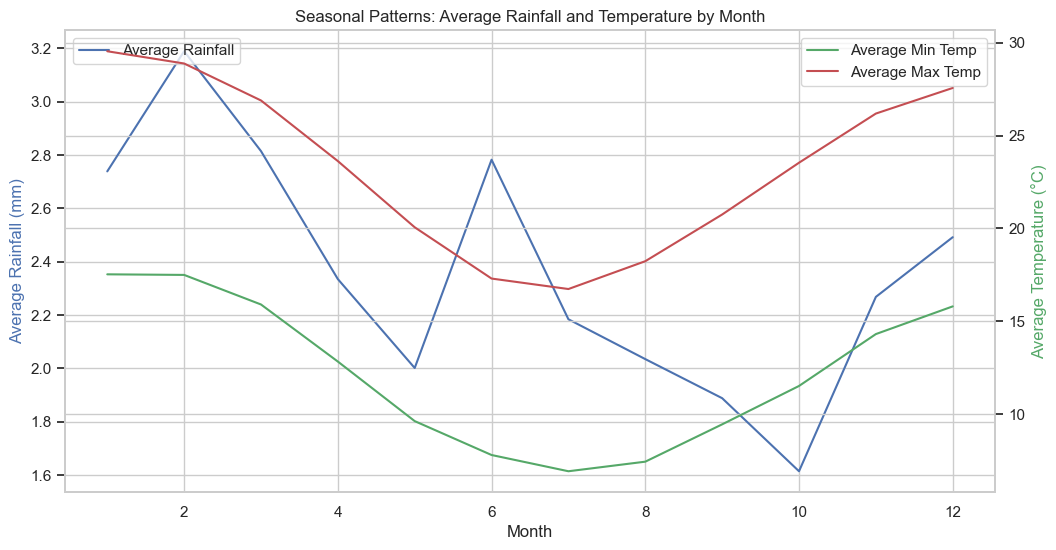

In [7]:
# # Convert the 'Date' column to datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate the average rainfall and temperature by month
monthly_avg = df.groupby('Month').agg({
    'Rainfall': 'mean',
    'MinTemp': 'mean',
    'MaxTemp': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plot data
sns.lineplot(x='Month', y='Rainfall', data=monthly_avg, ax=ax1, label='Average Rainfall', color='b')
sns.lineplot(x='Month', y='MinTemp', data=monthly_avg, ax=ax2, label='Average Min Temp', color='g')
sns.lineplot(x='Month', y='MaxTemp', data=monthly_avg, ax=ax2, label='Average Max Temp', color='r')

# Add labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Rainfall (mm)', color='b')
ax2.set_ylabel('Average Temperature (°C)', color='g')
ax1.set_title('Seasonal Patterns: Average Rainfall and Temperature by Month')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

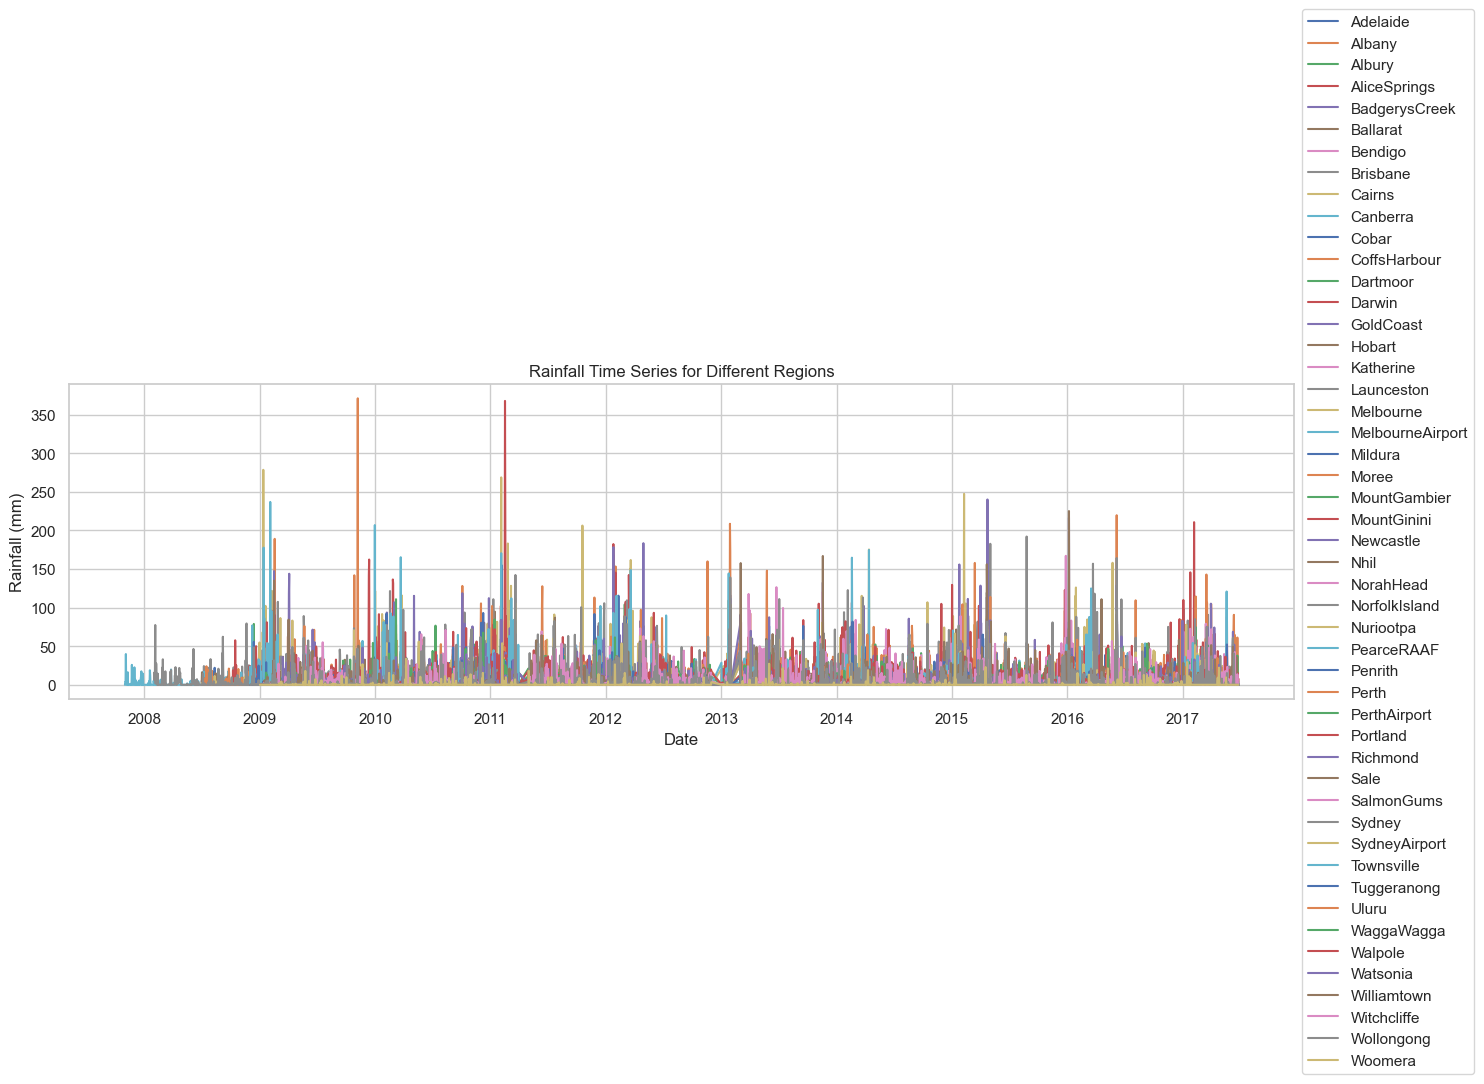

In [8]:
import matplotlib.pyplot as plt

# Group the data by 'Location' and 'Date' and sum the 'Rainfall'
grouped_data = df.groupby(['Location', 'Date'])['Rainfall'].sum().reset_index()

# Plotting the time series data for each location
plt.figure(figsize=(15, 8))

locations = grouped_data['Location'].unique()

for location in locations:
    location_data = grouped_data[grouped_data['Location'] == location]
    plt.plot(location_data['Date'], location_data['Rainfall'], label=location)

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Time Series for Different Regions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

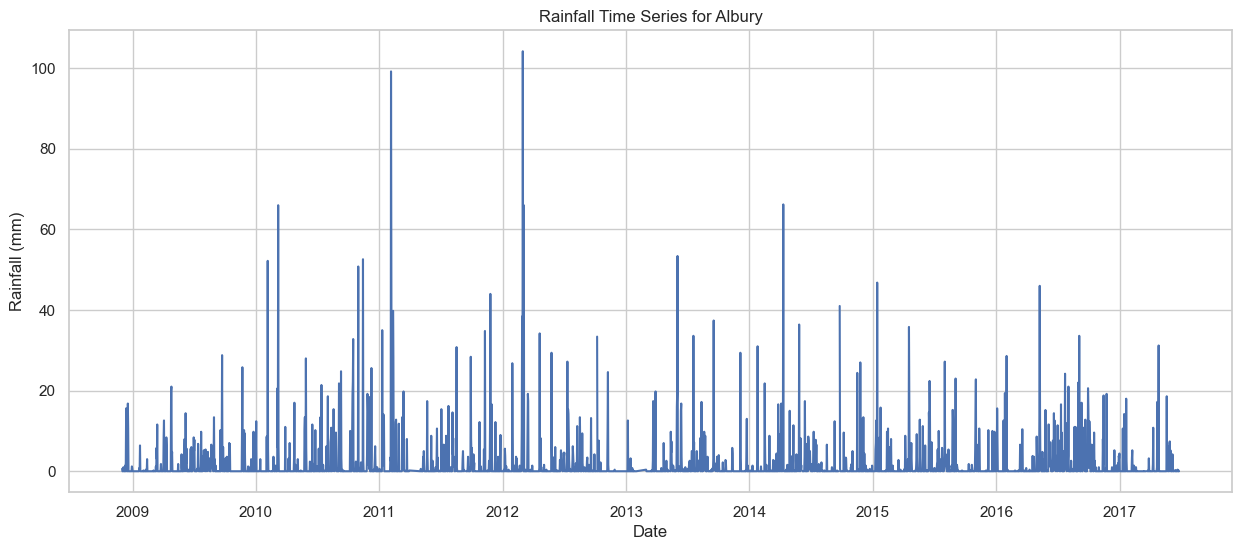

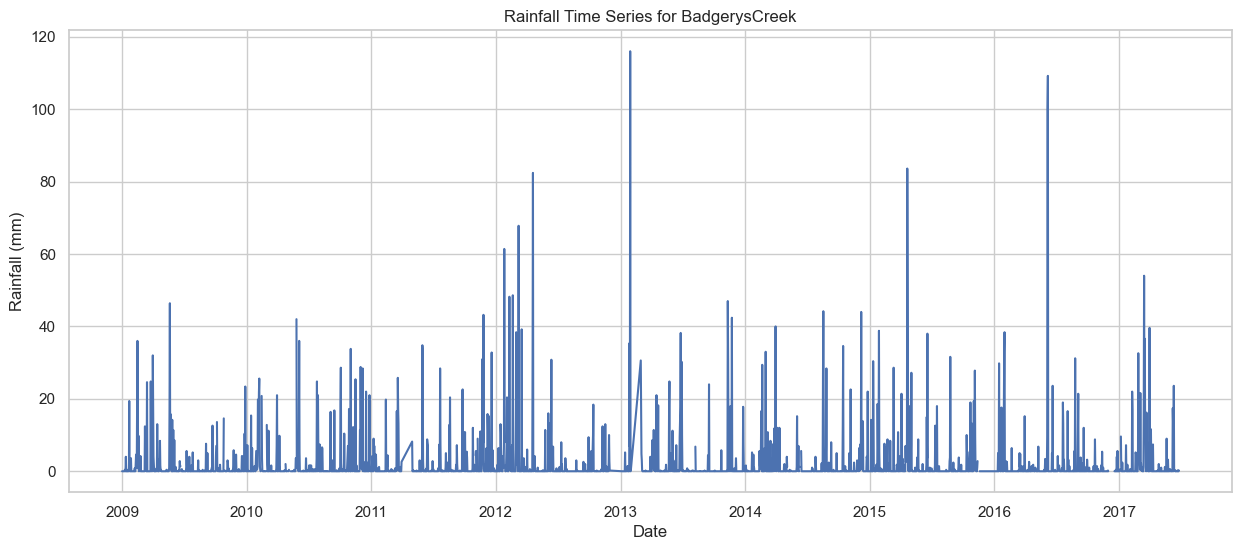

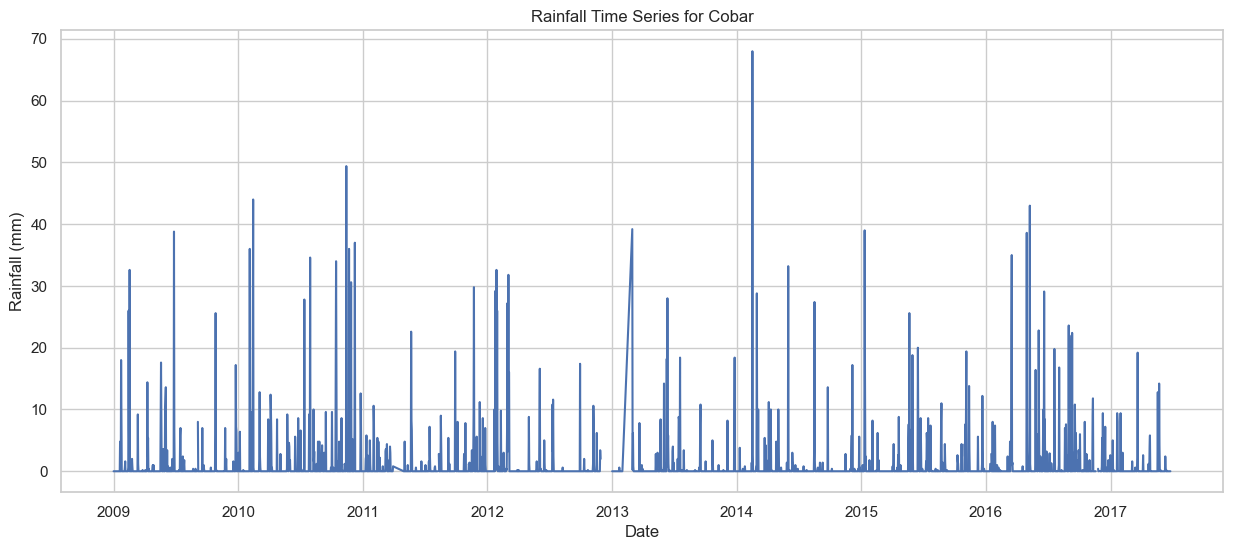

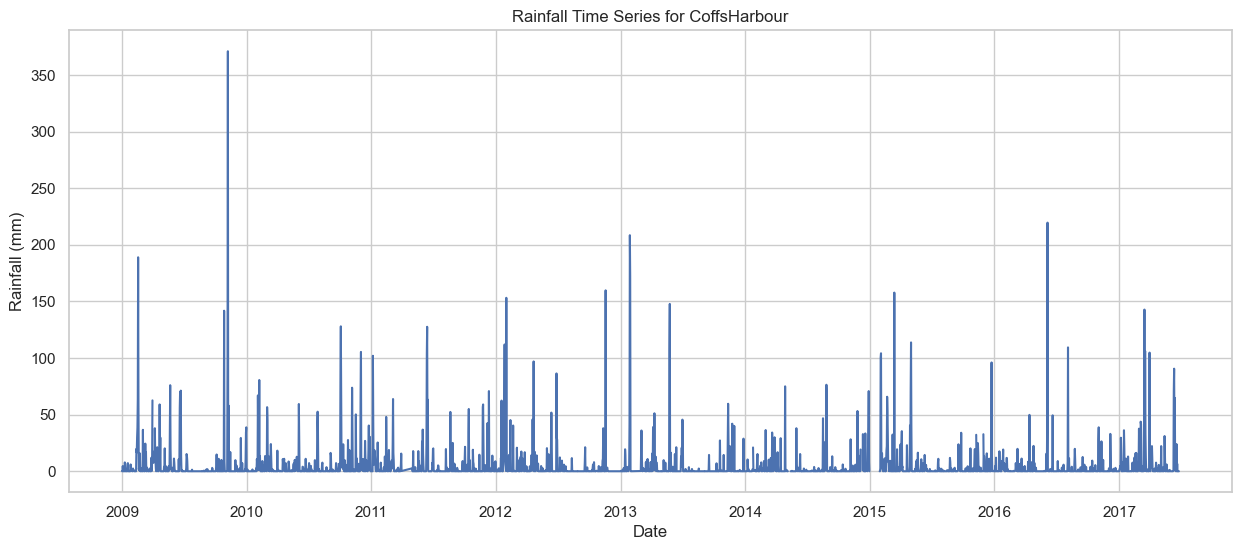

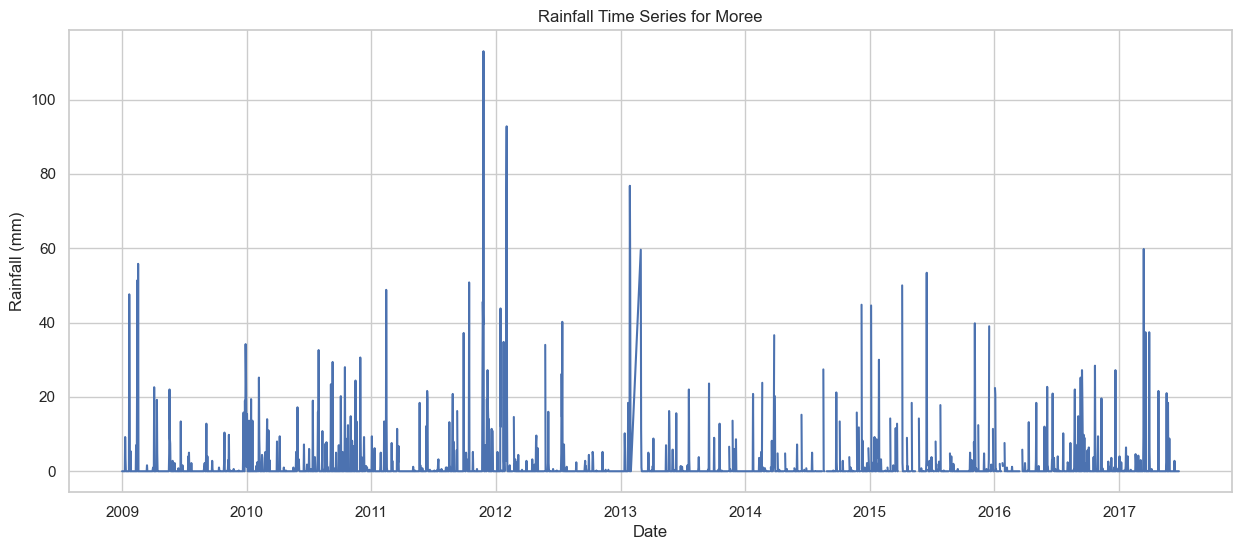

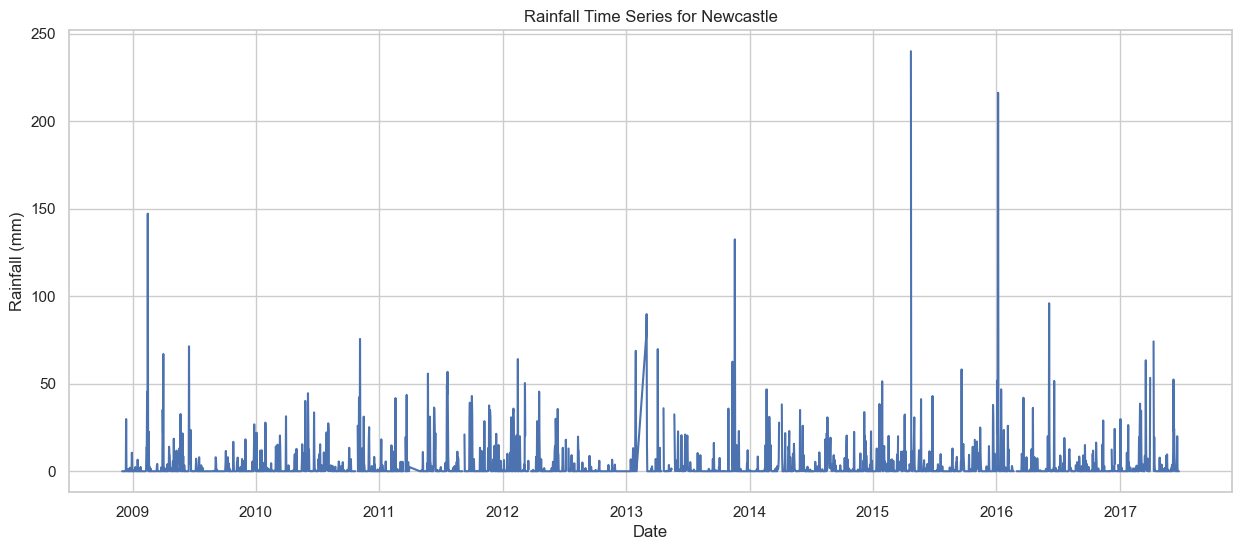

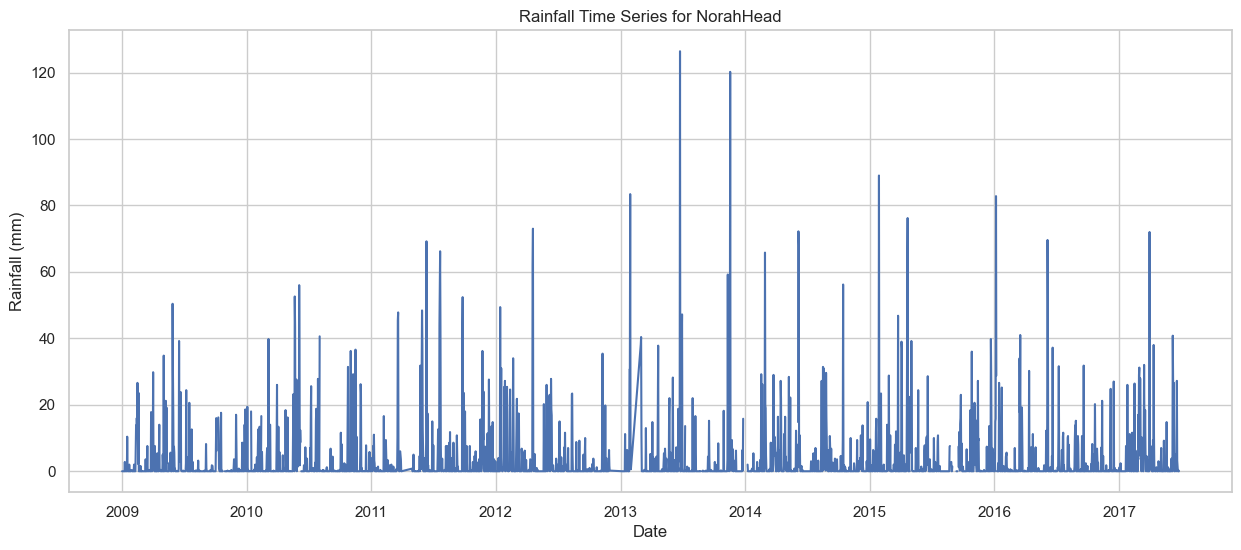

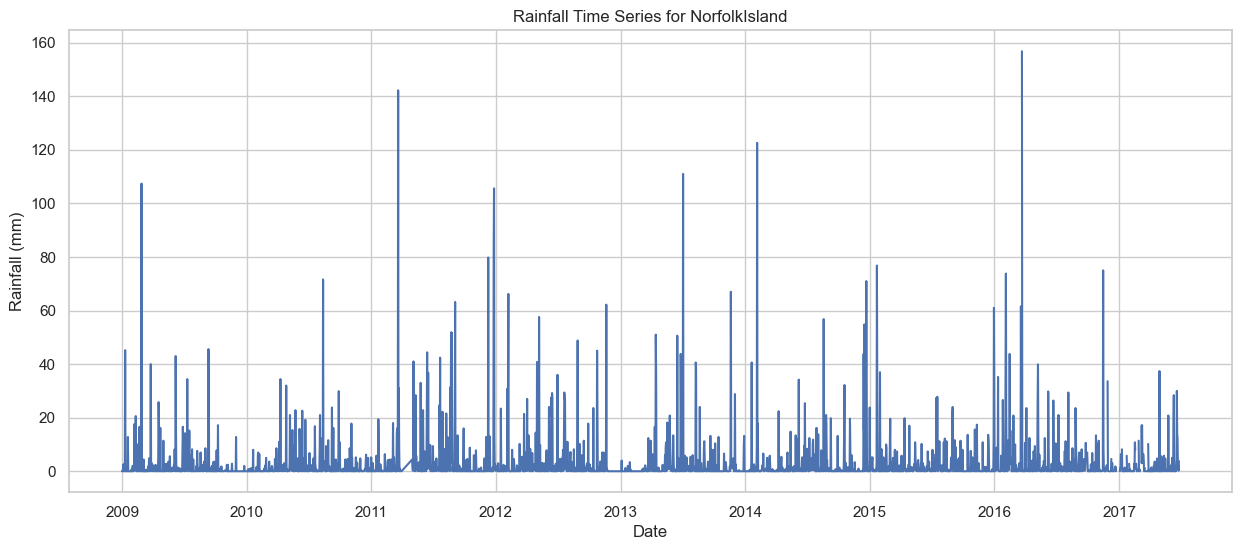

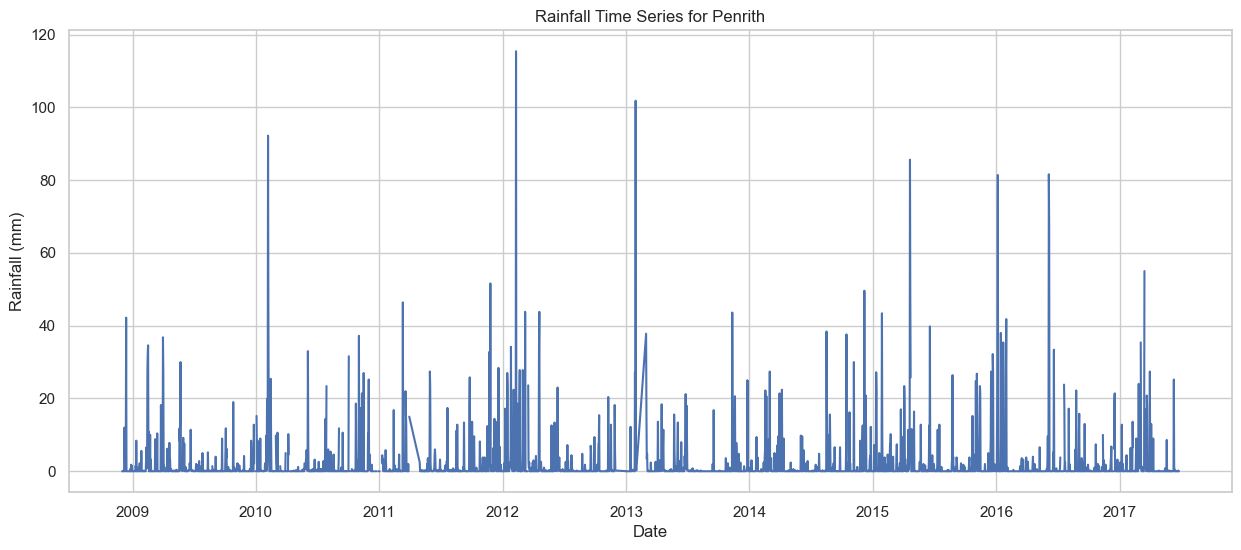

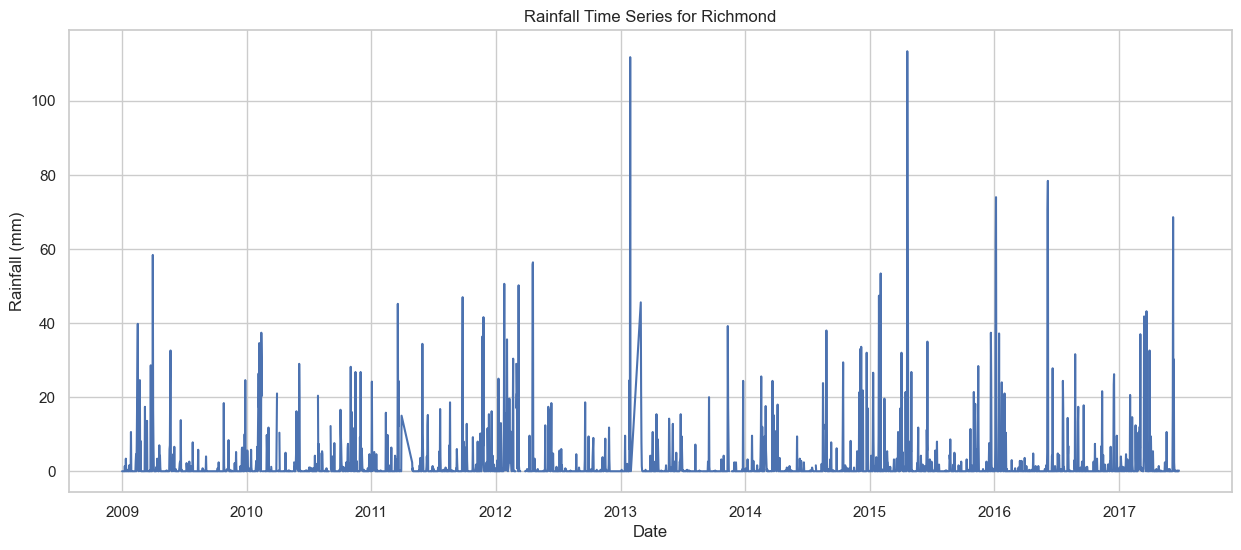

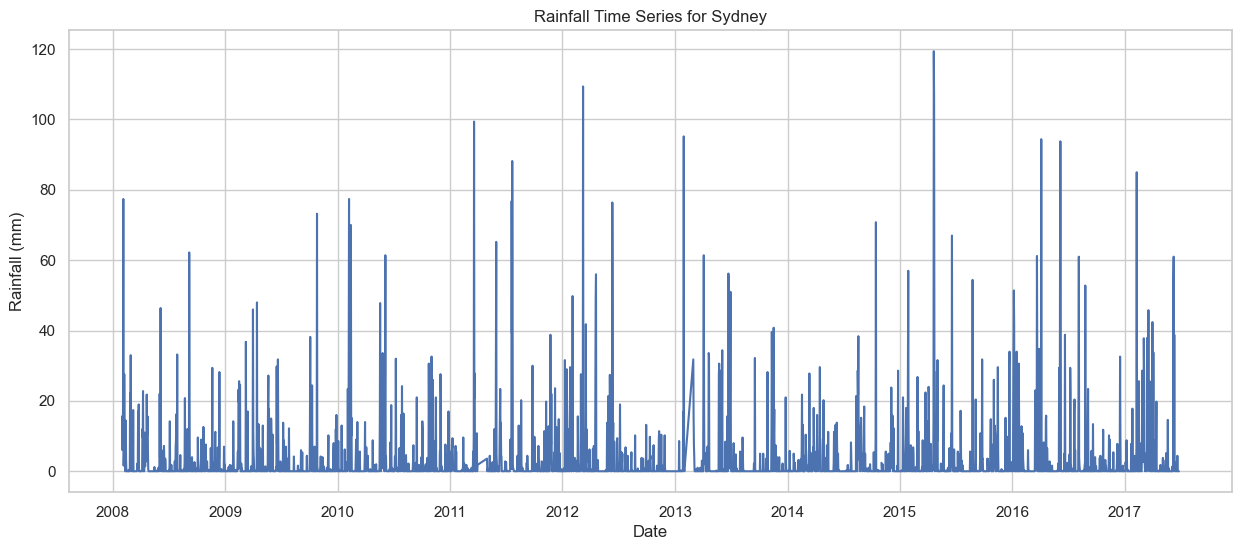

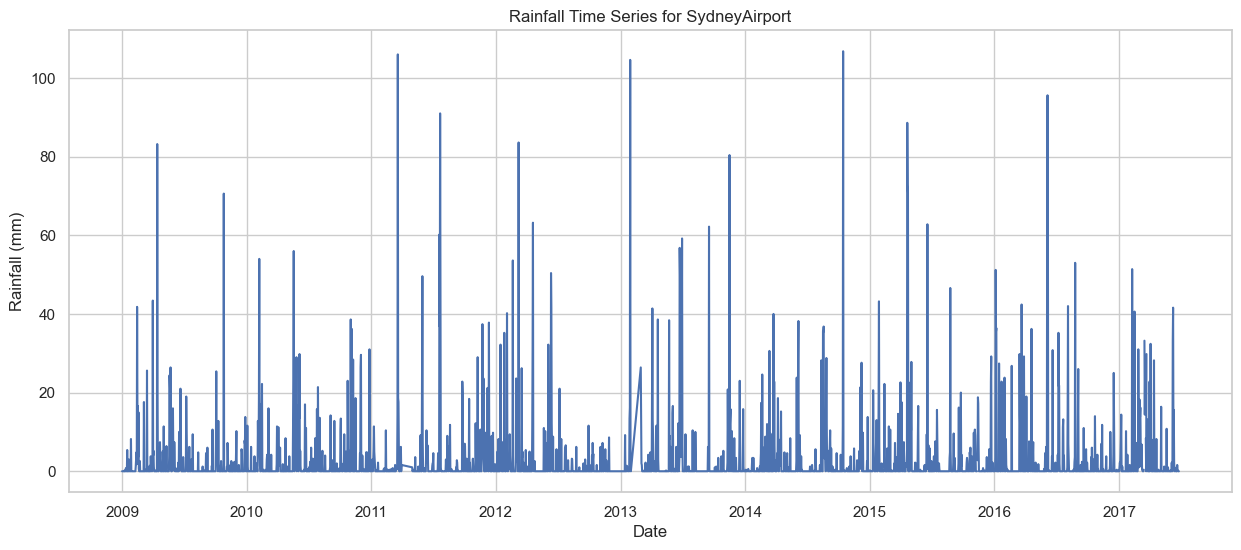

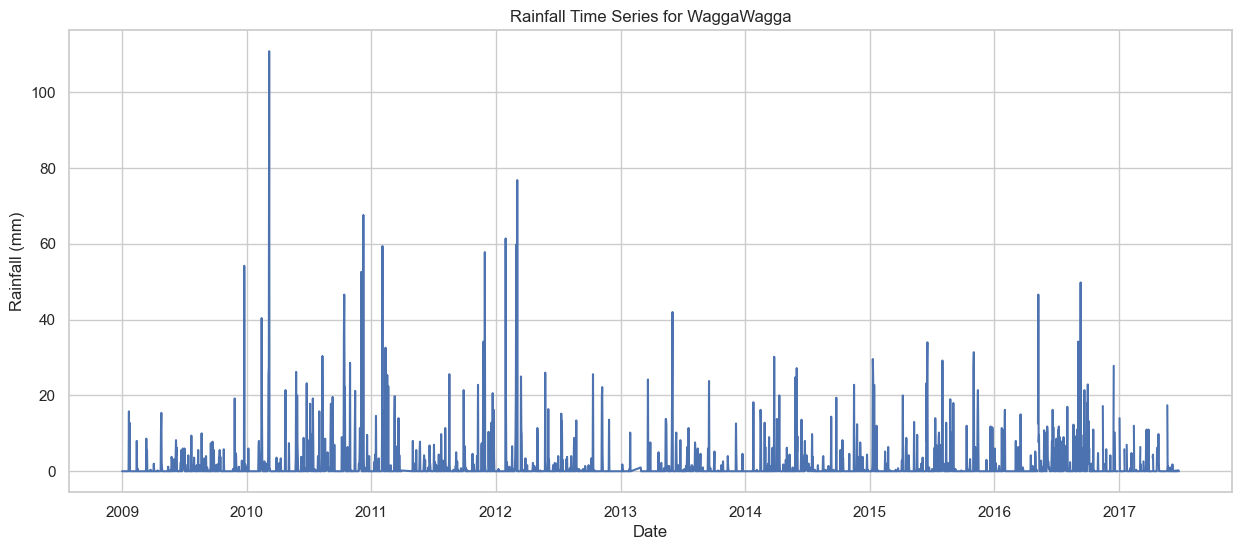

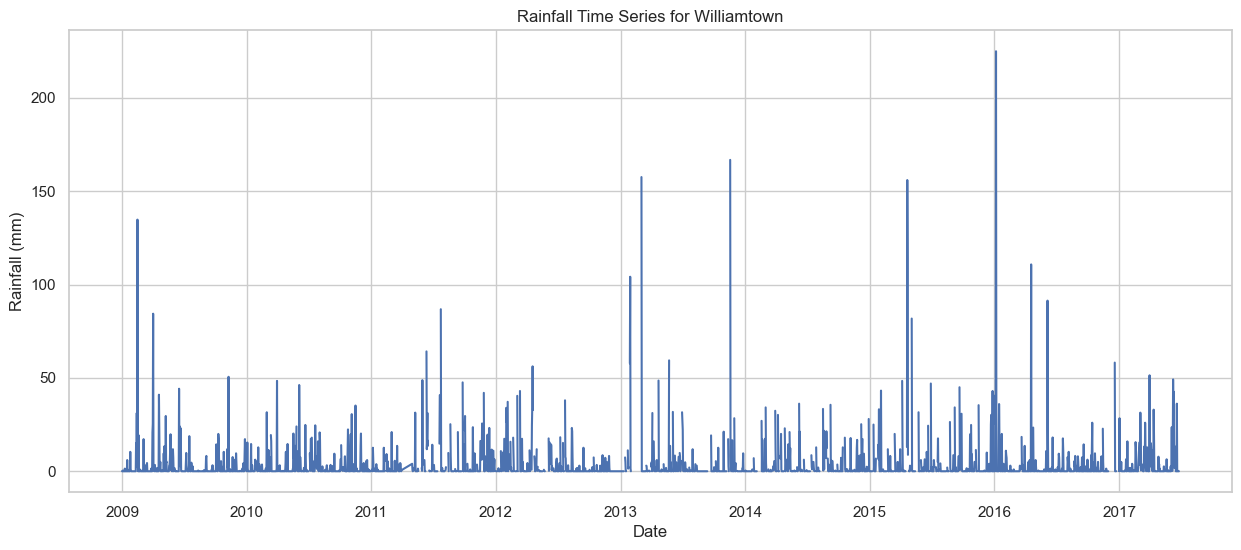

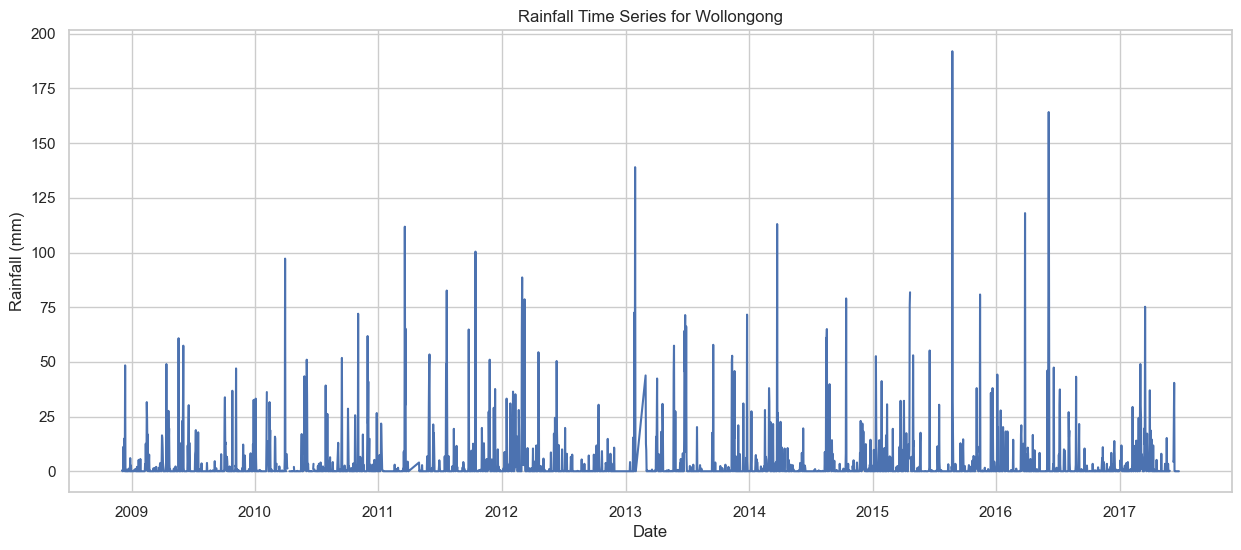

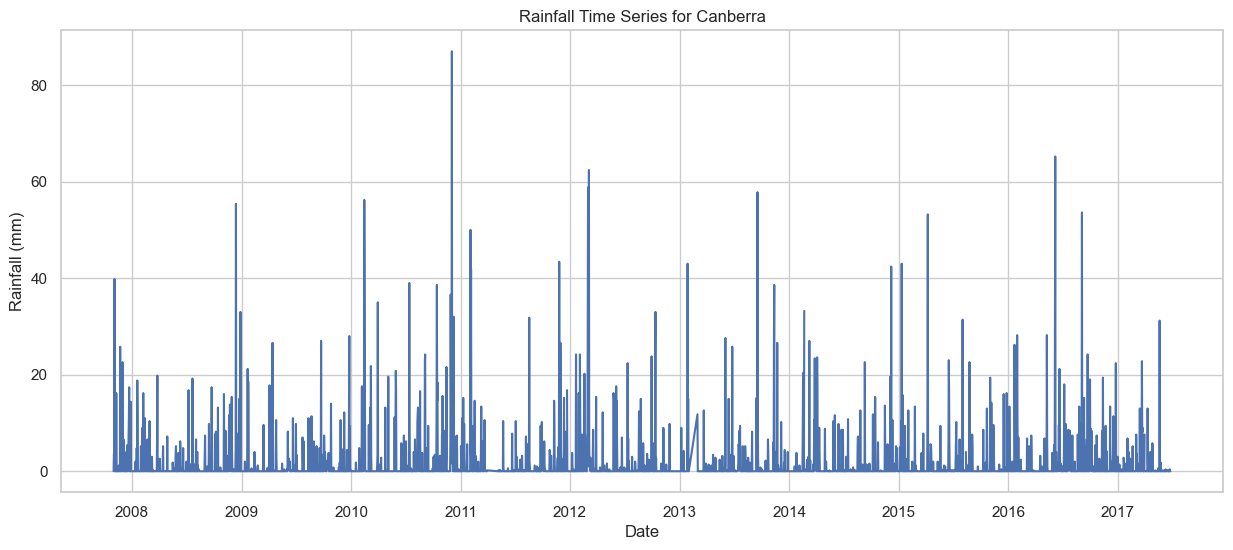

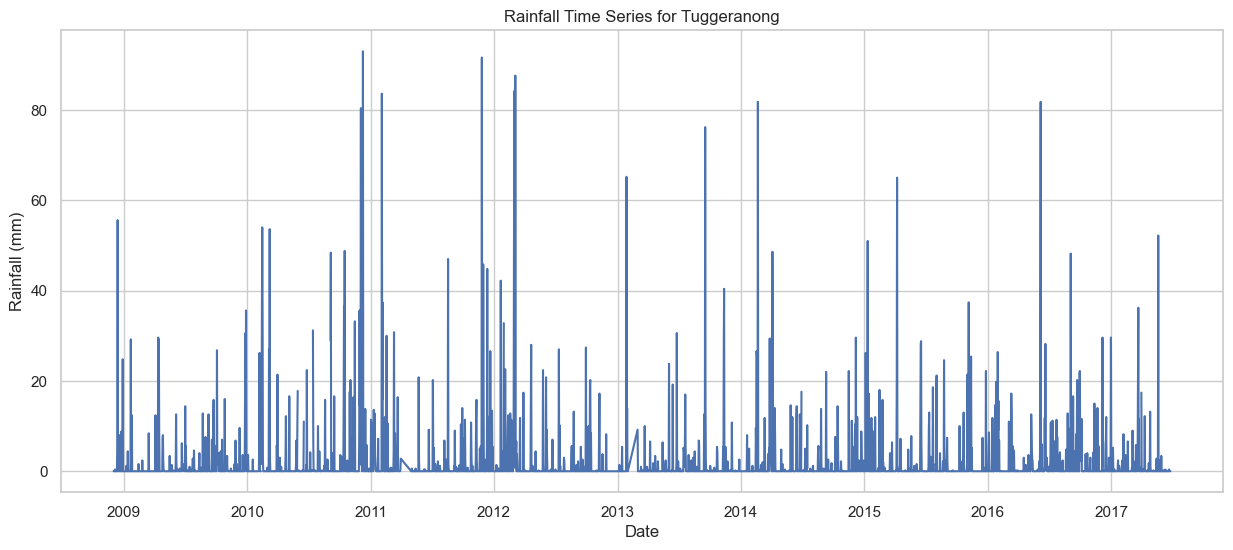

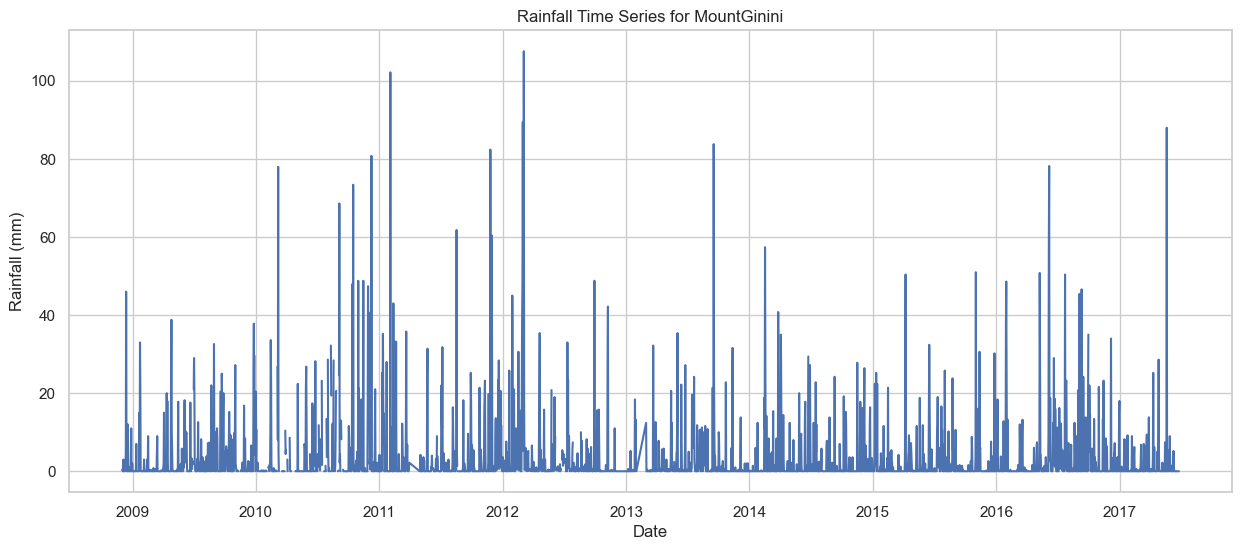

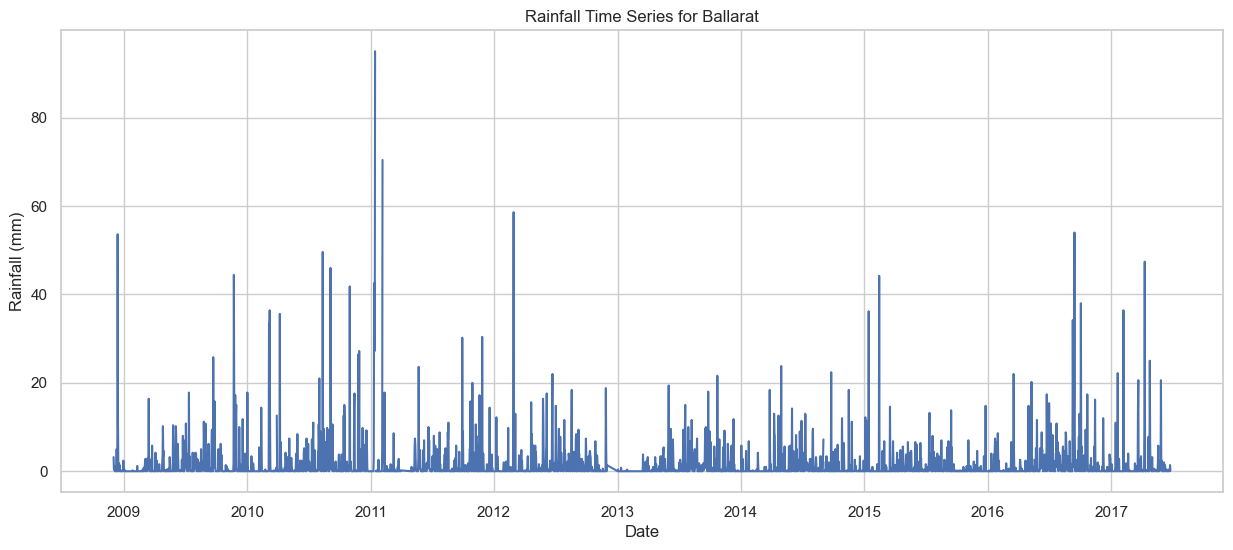

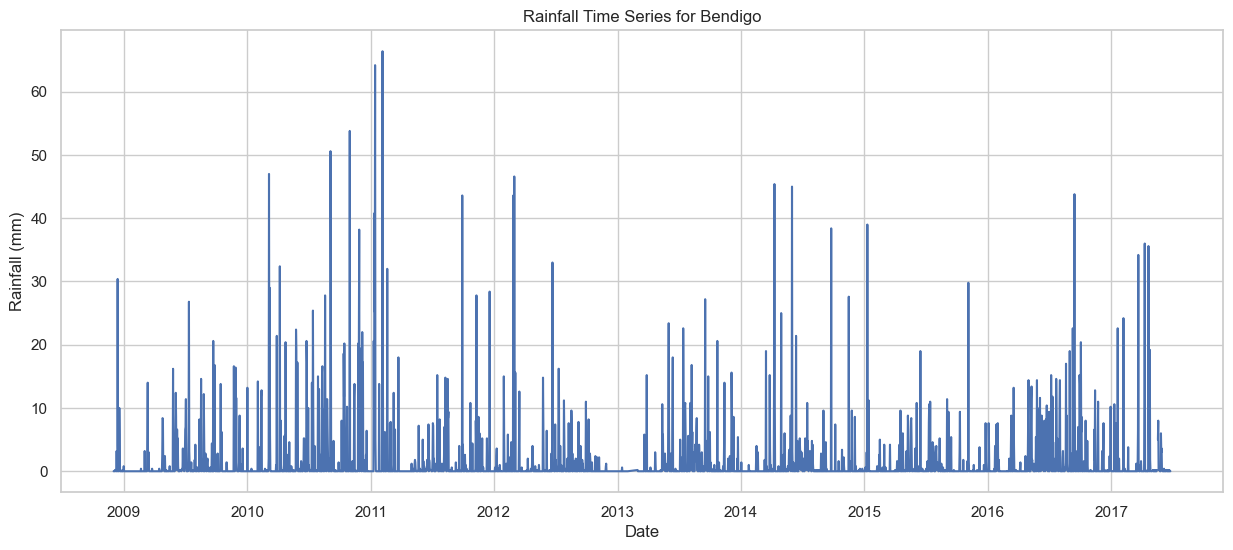

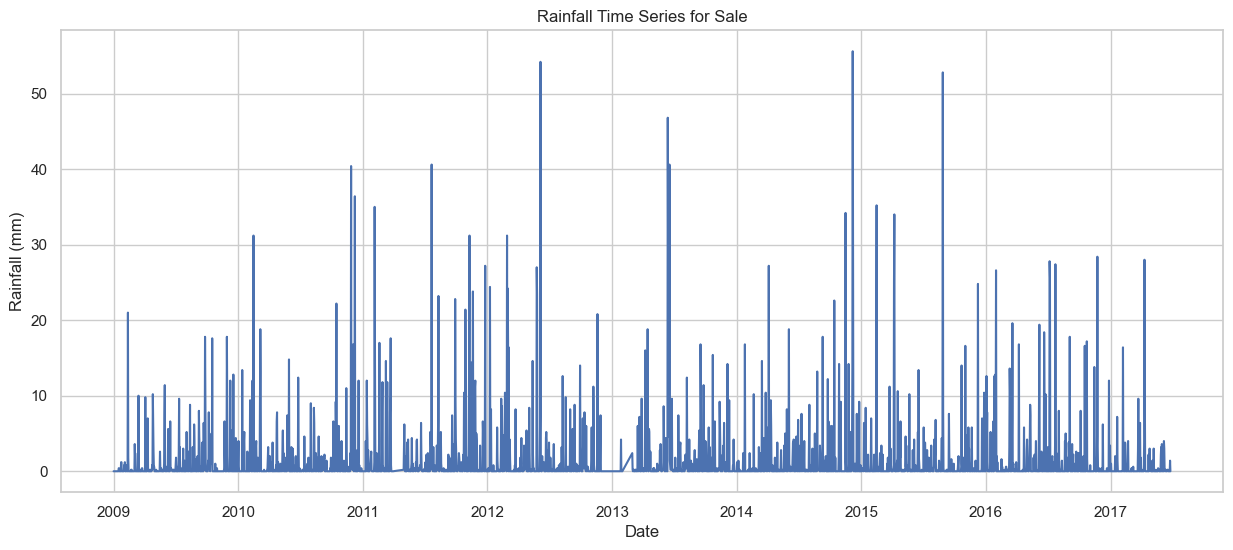

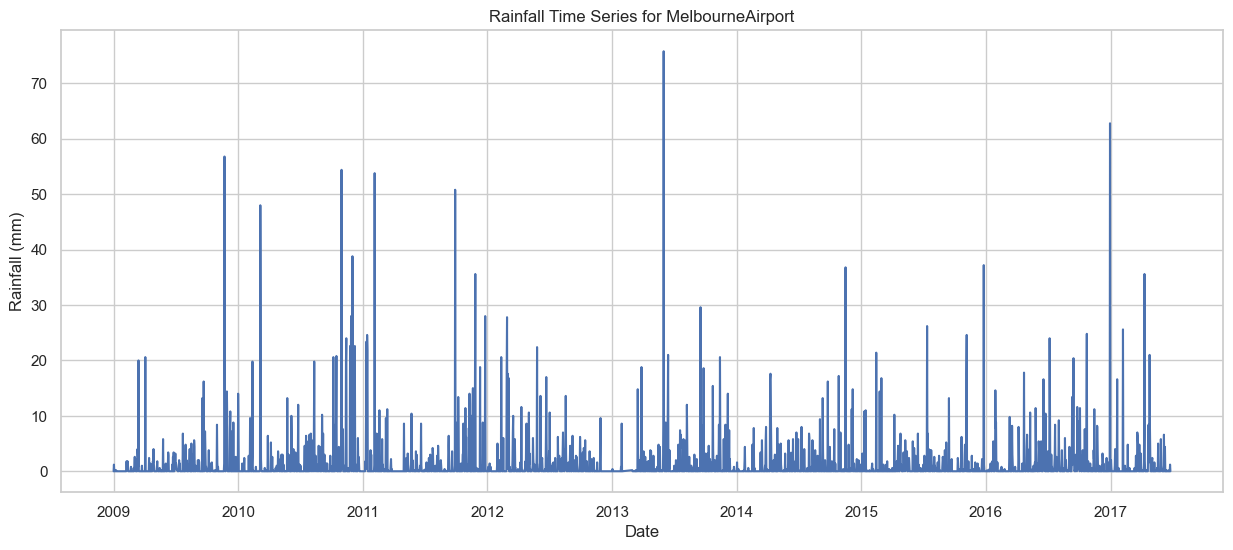

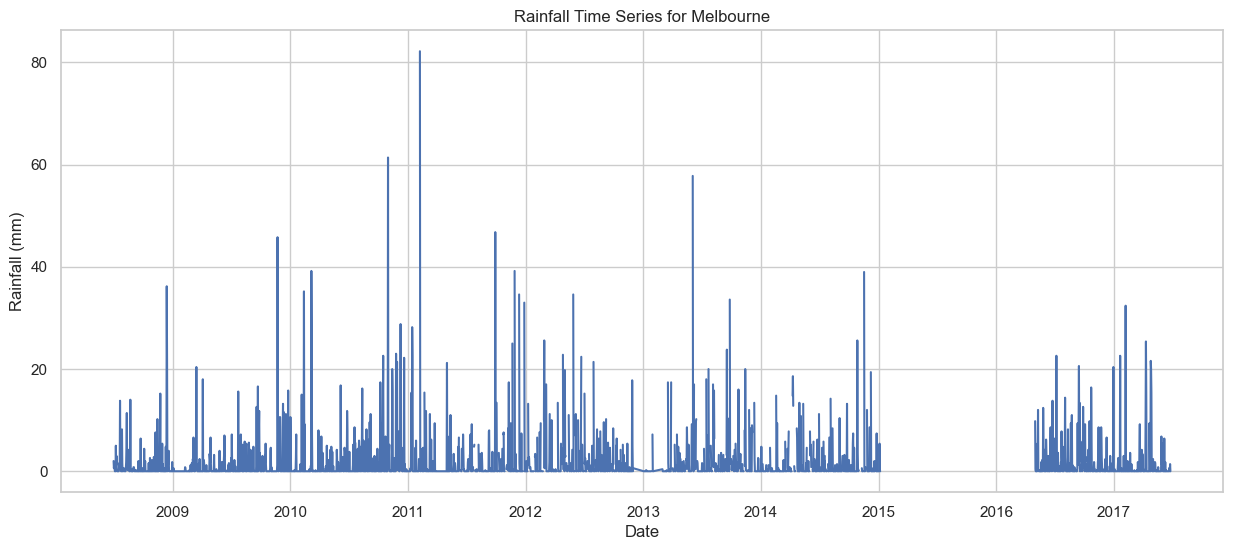

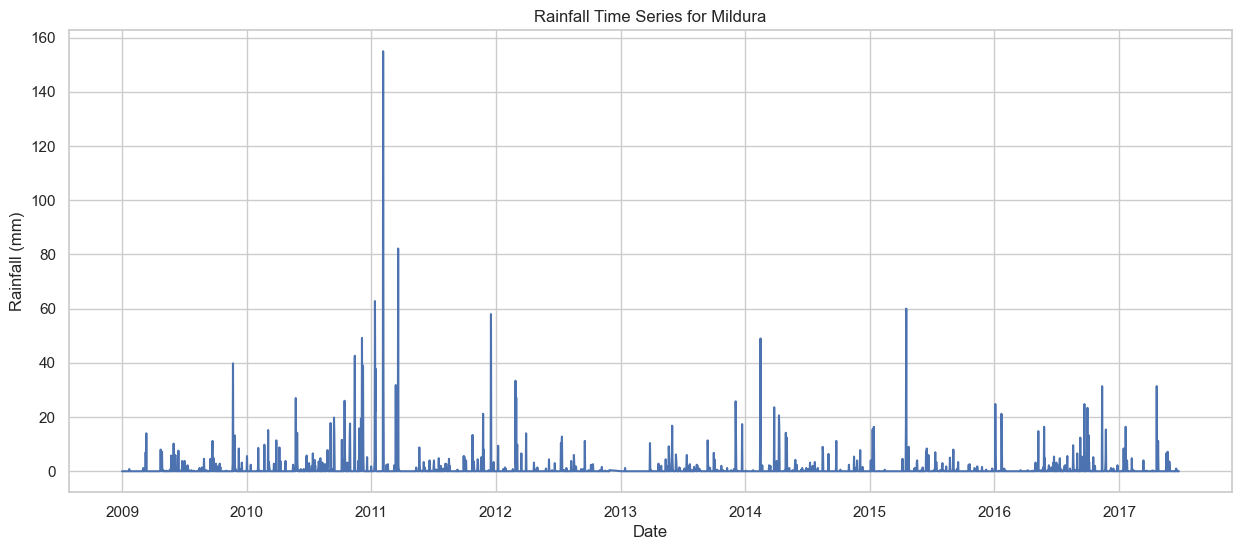

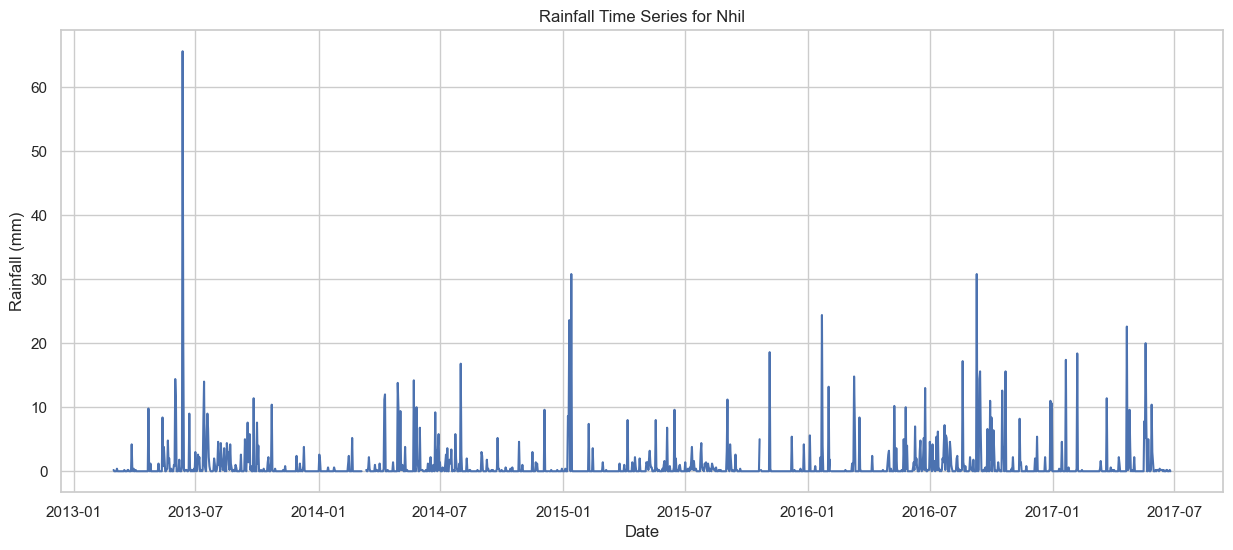

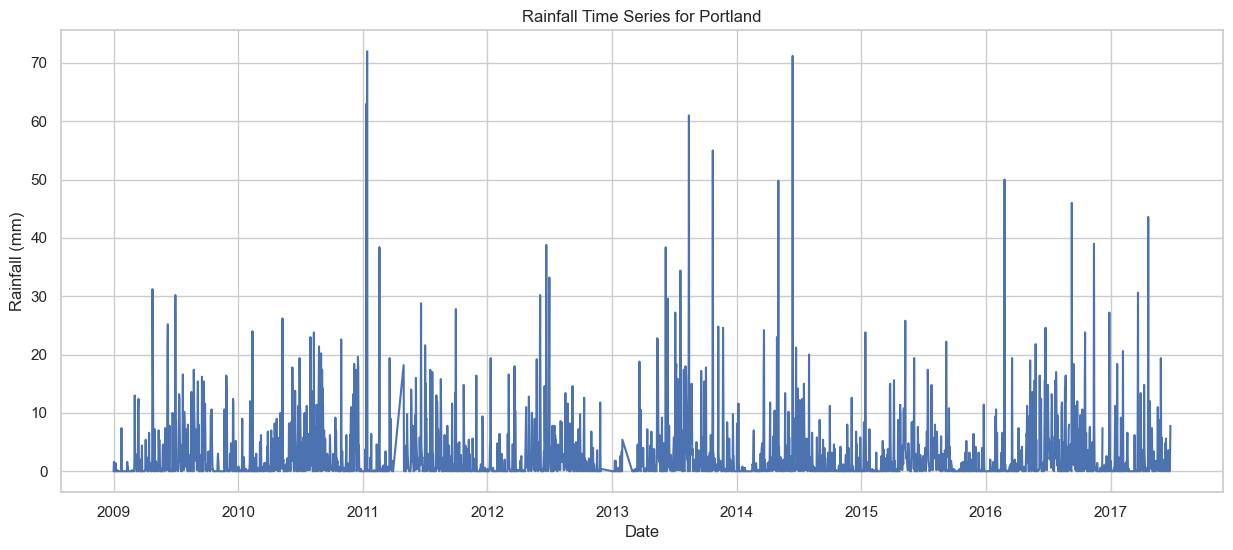

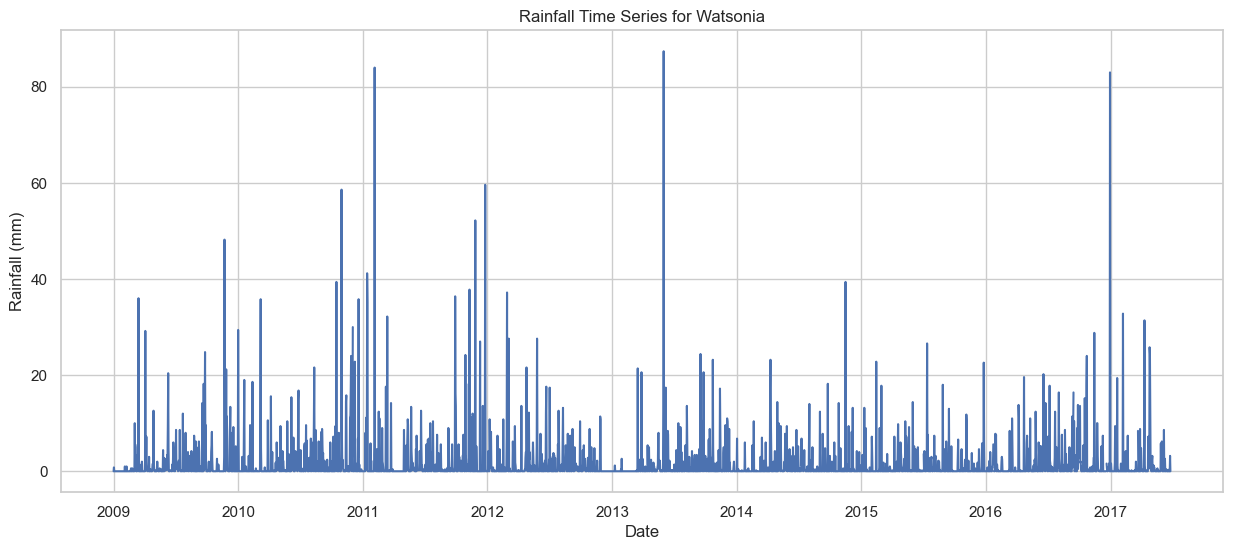

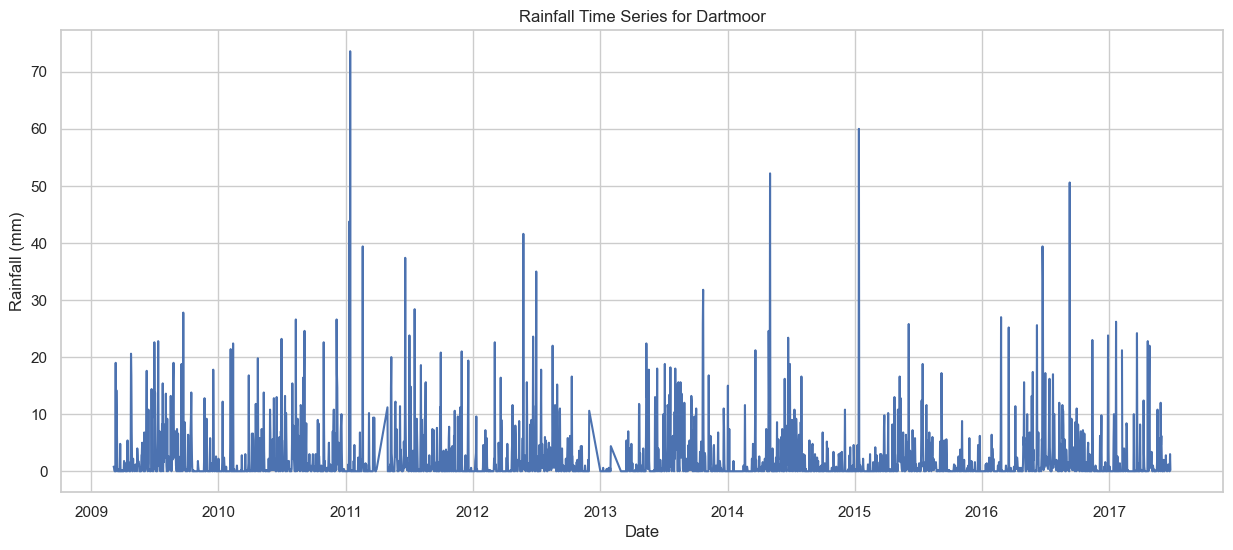

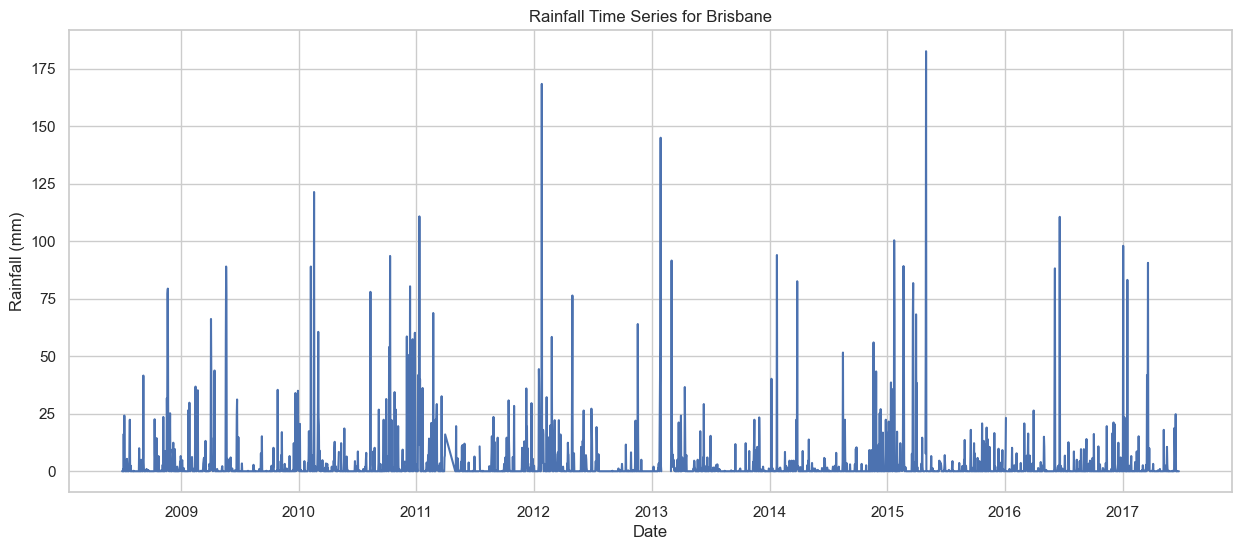

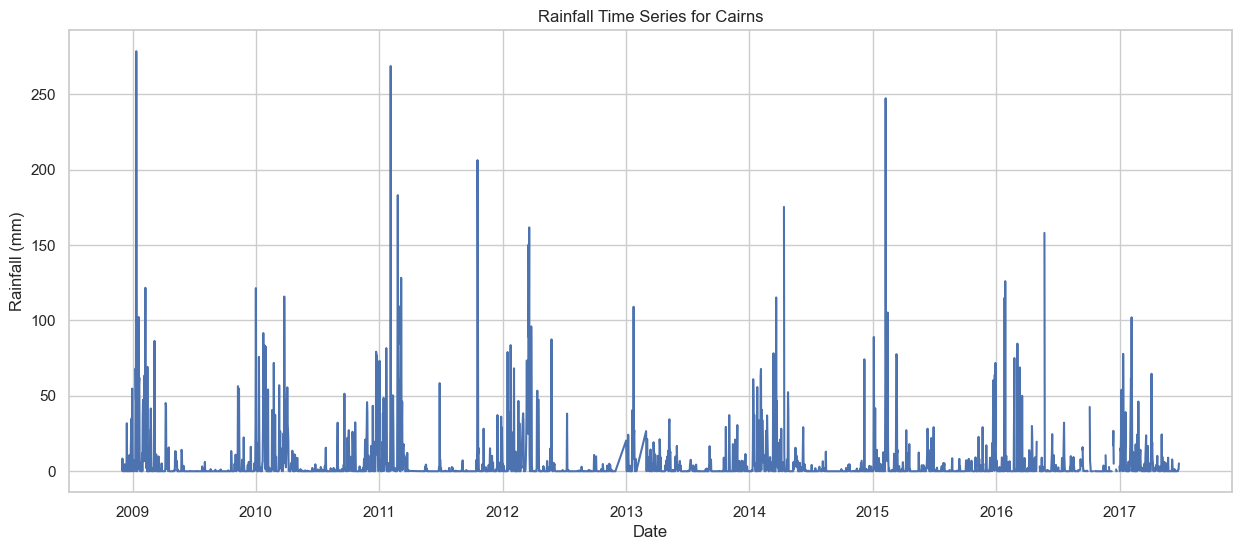

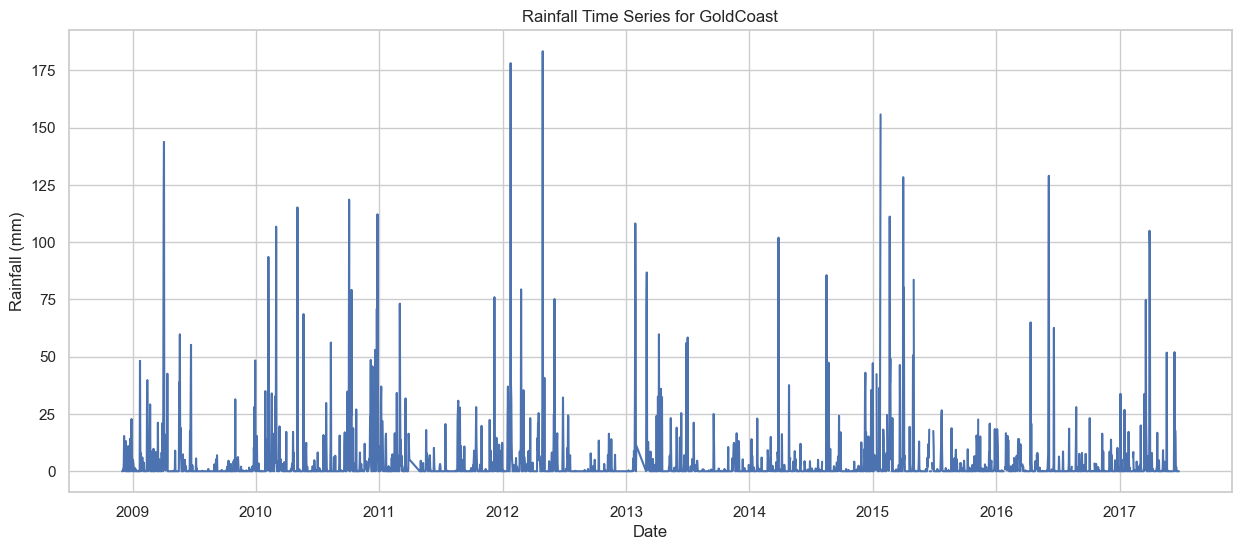

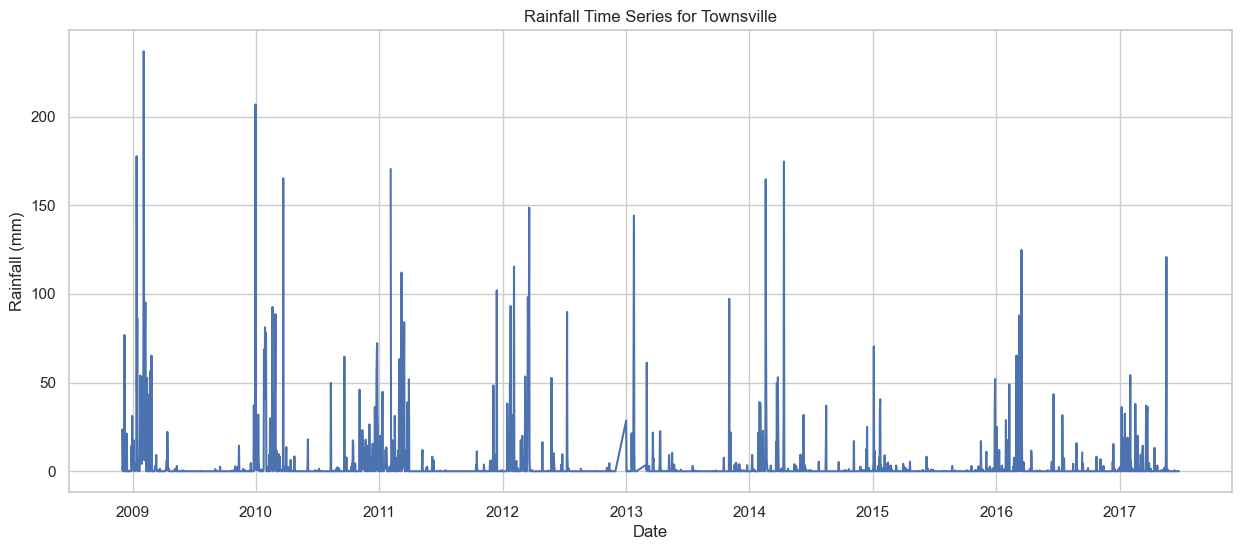

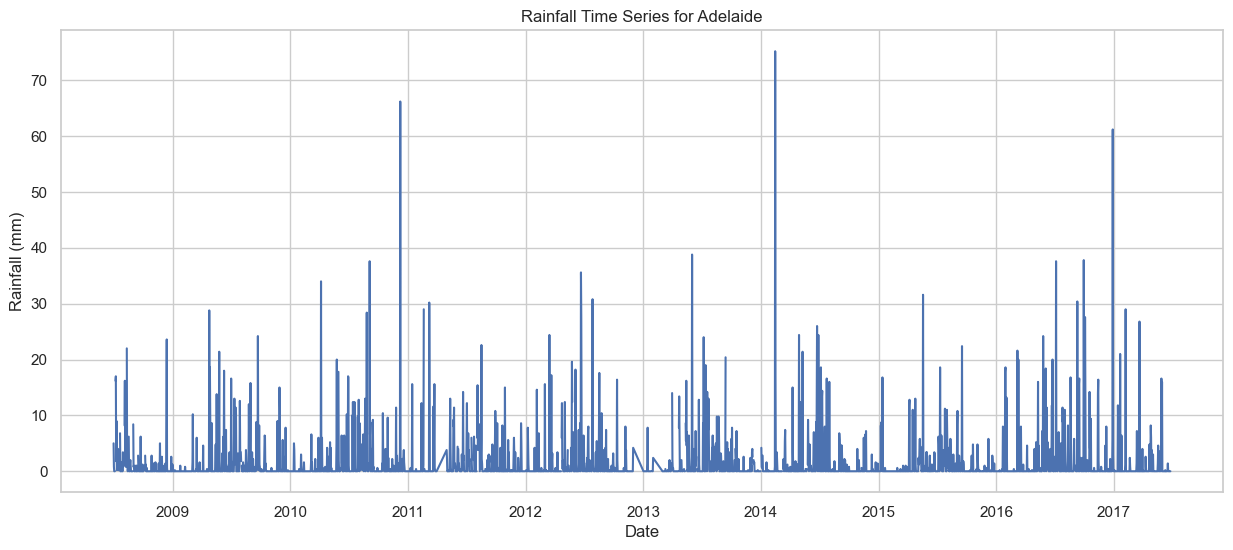

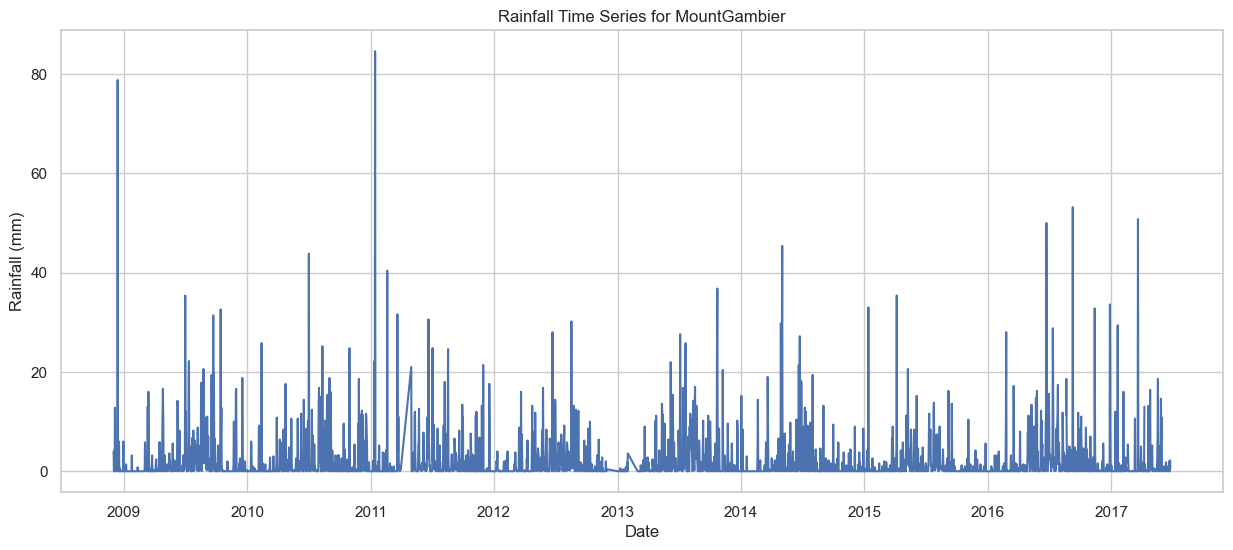

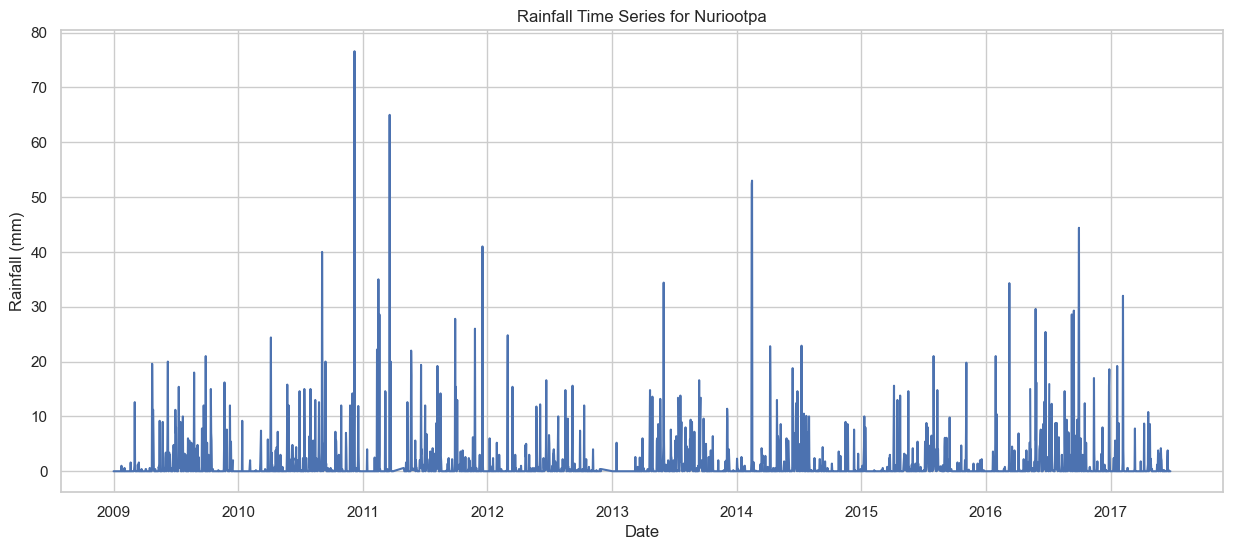

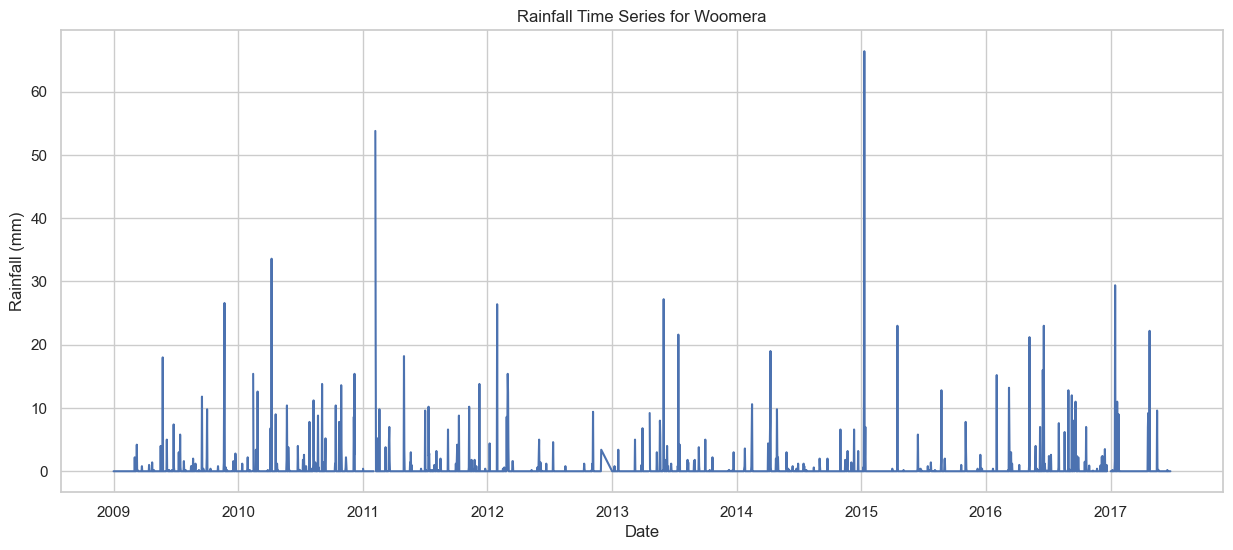

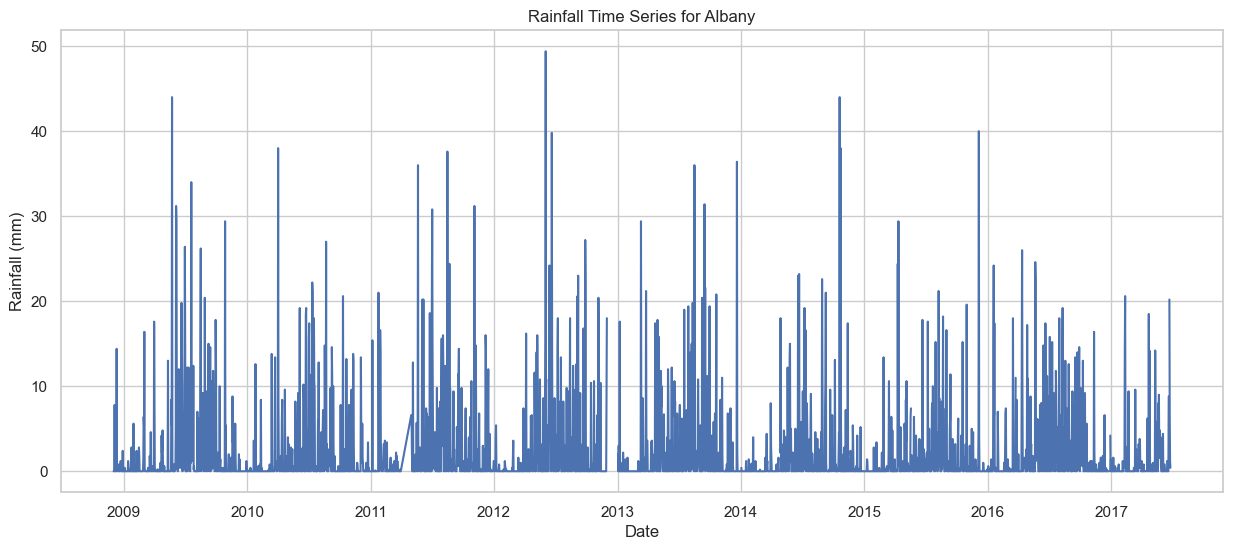

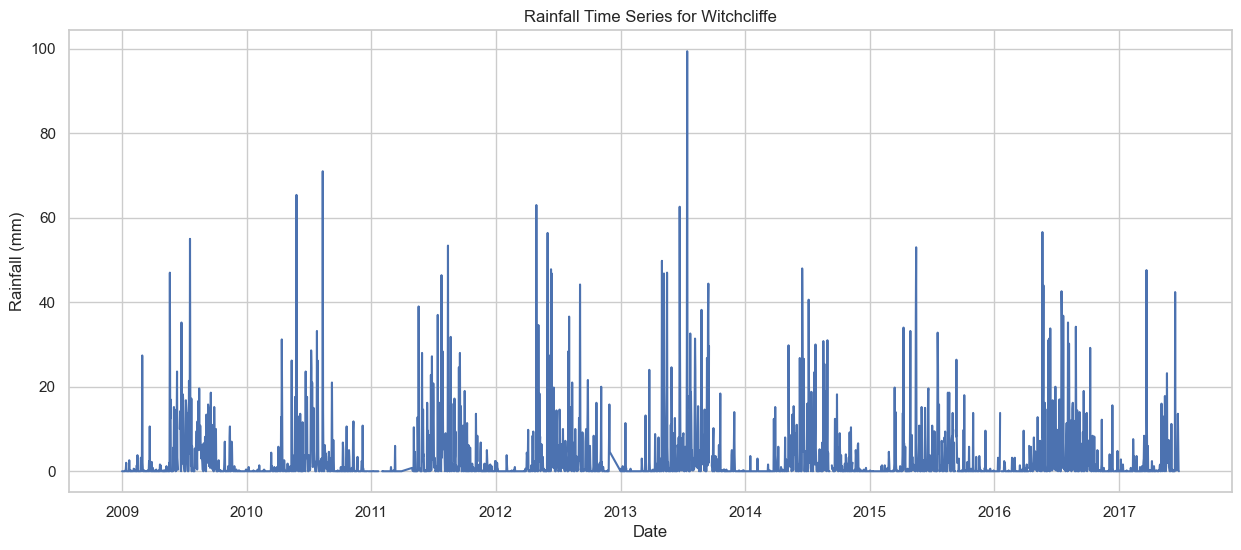

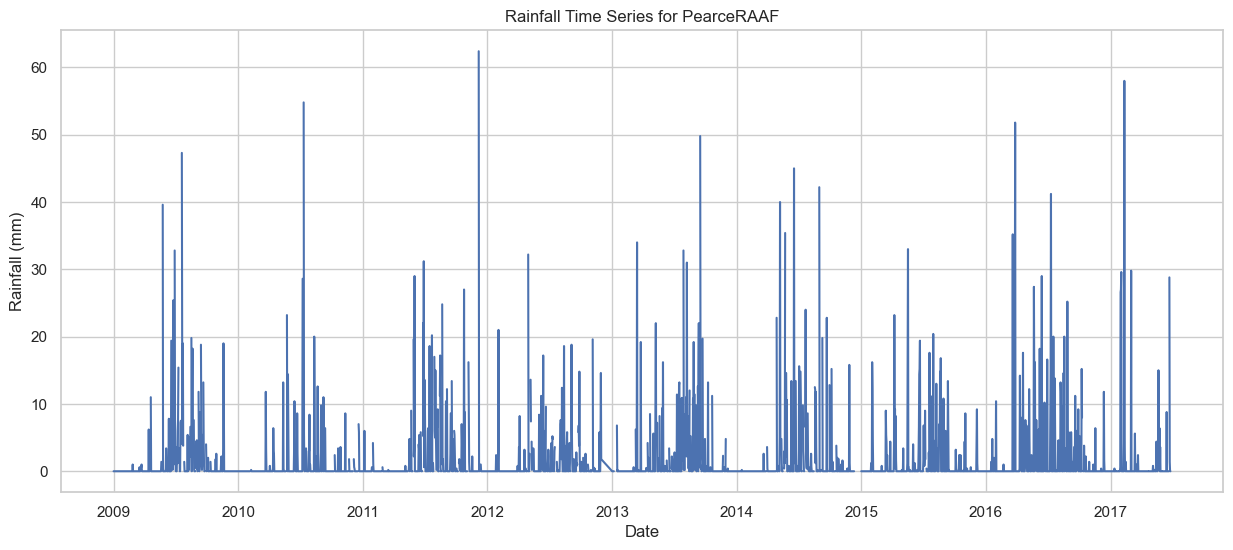

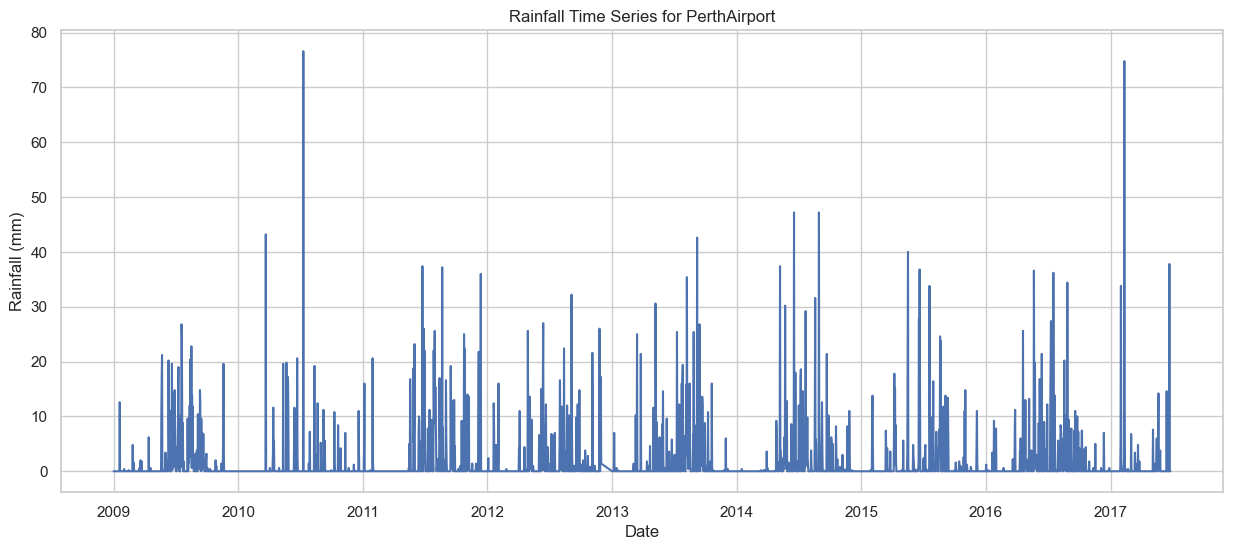

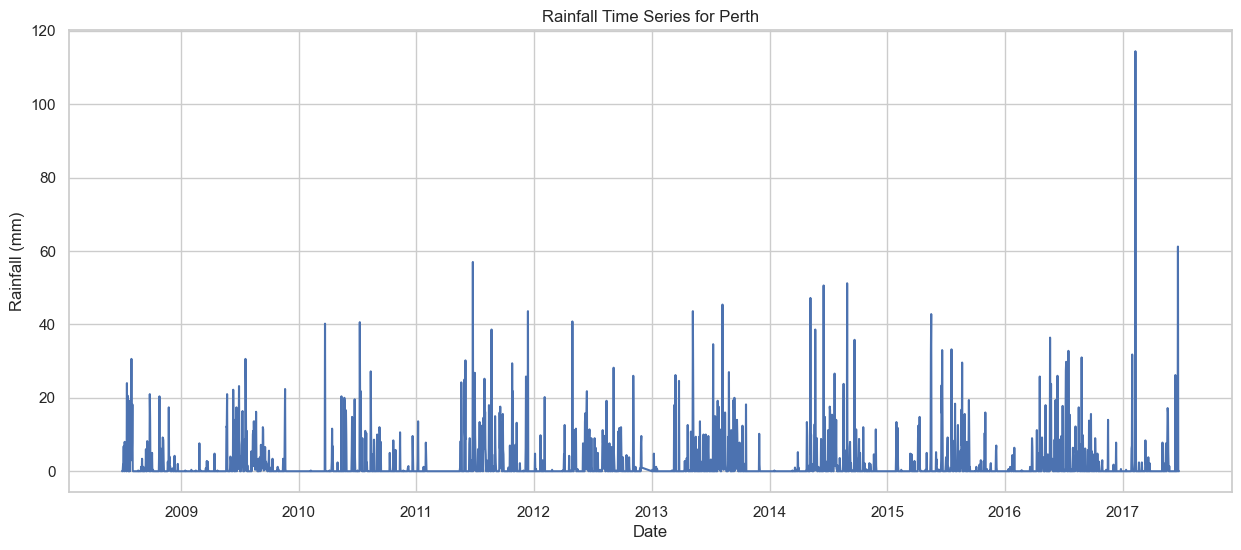

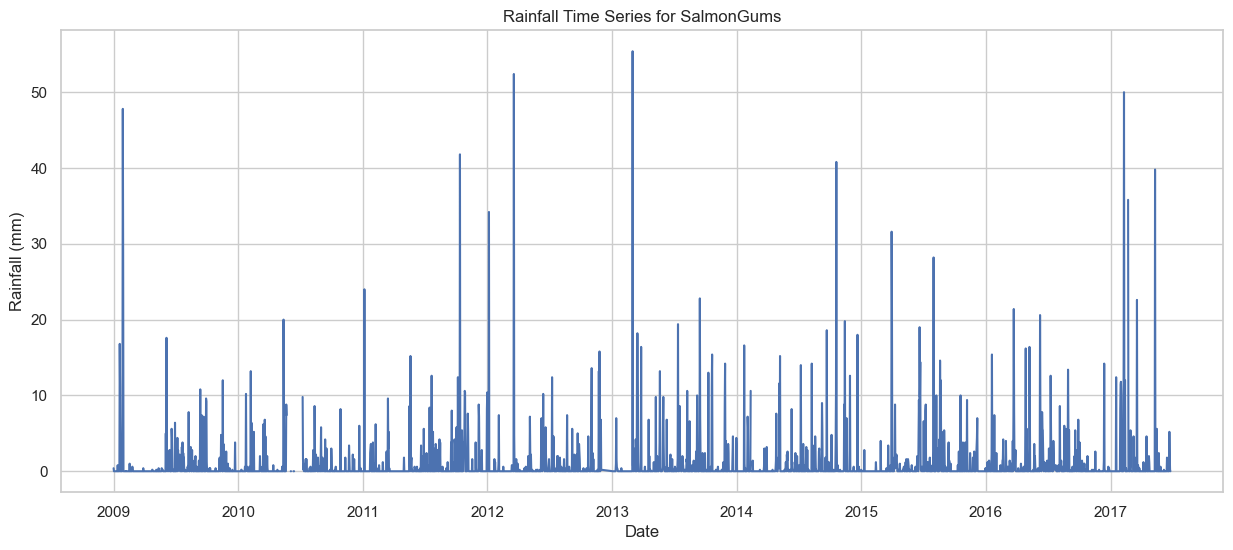

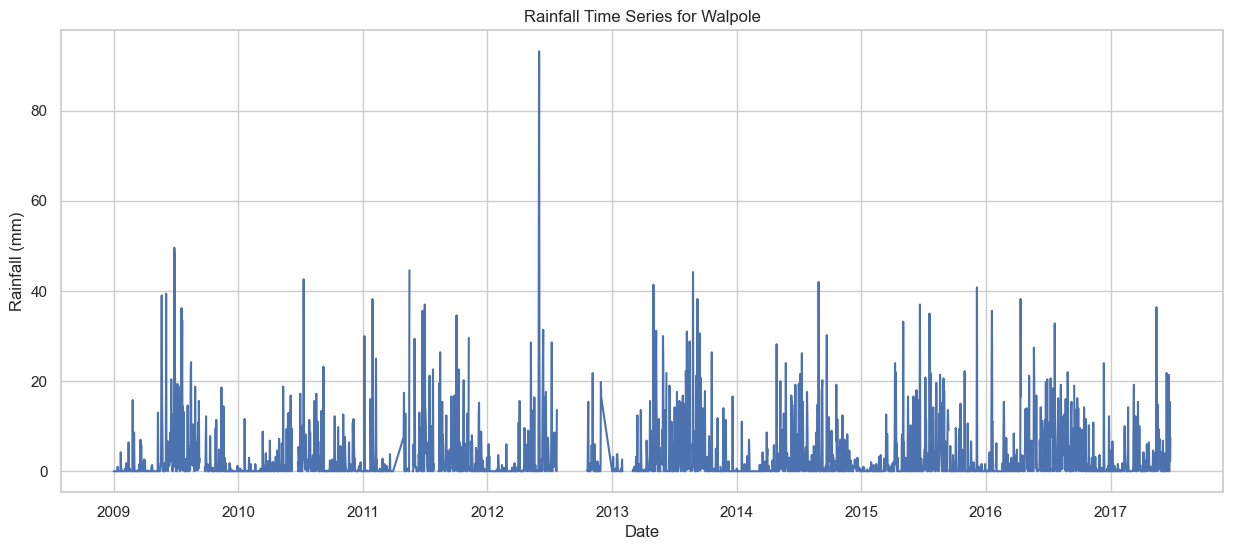

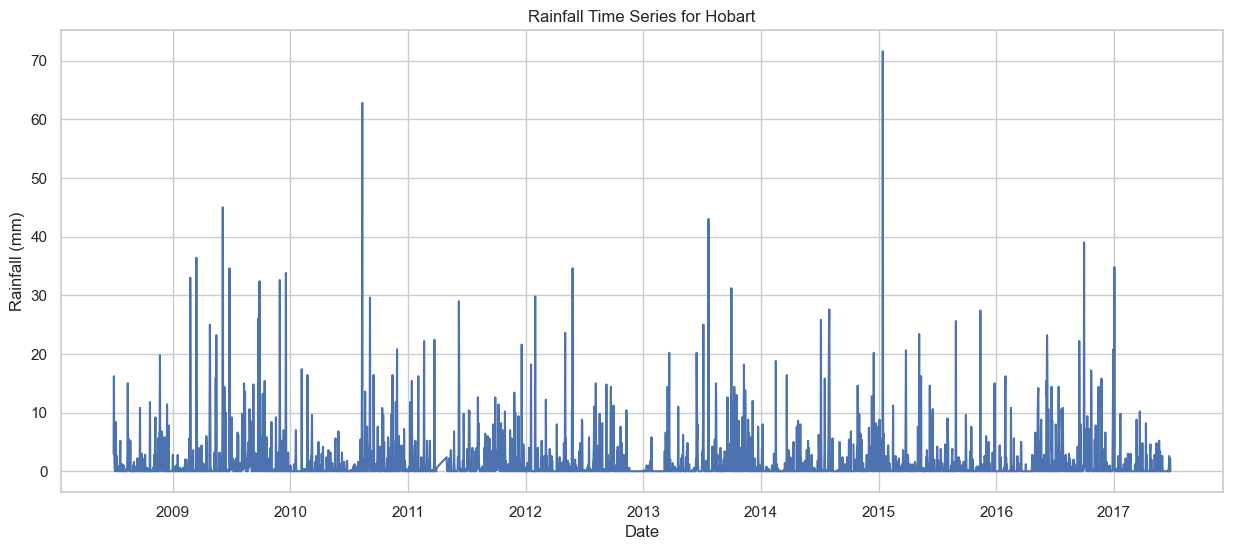

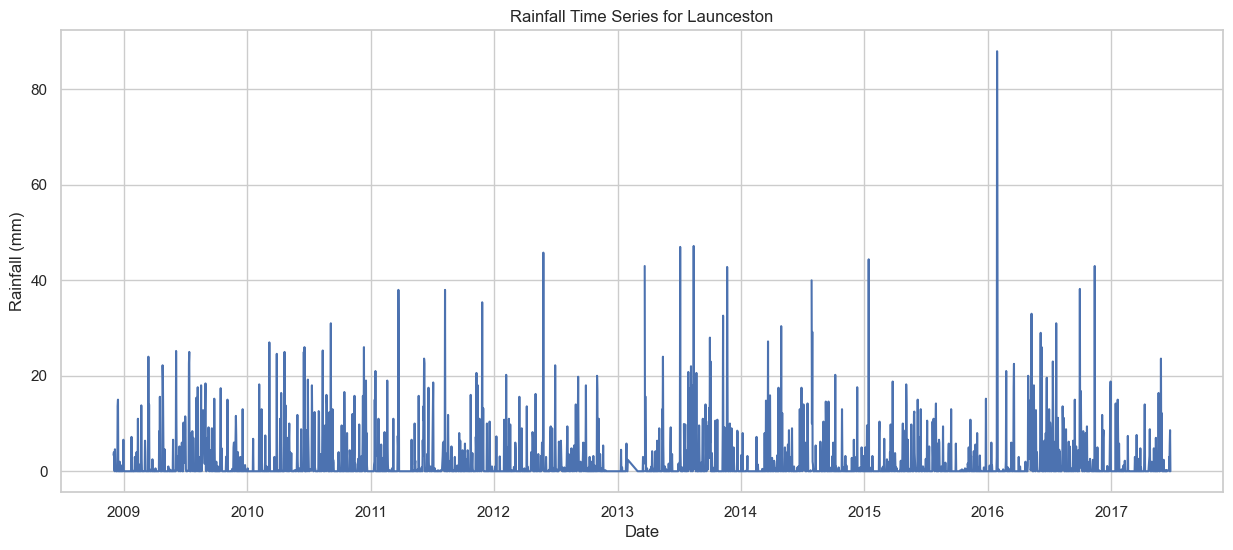

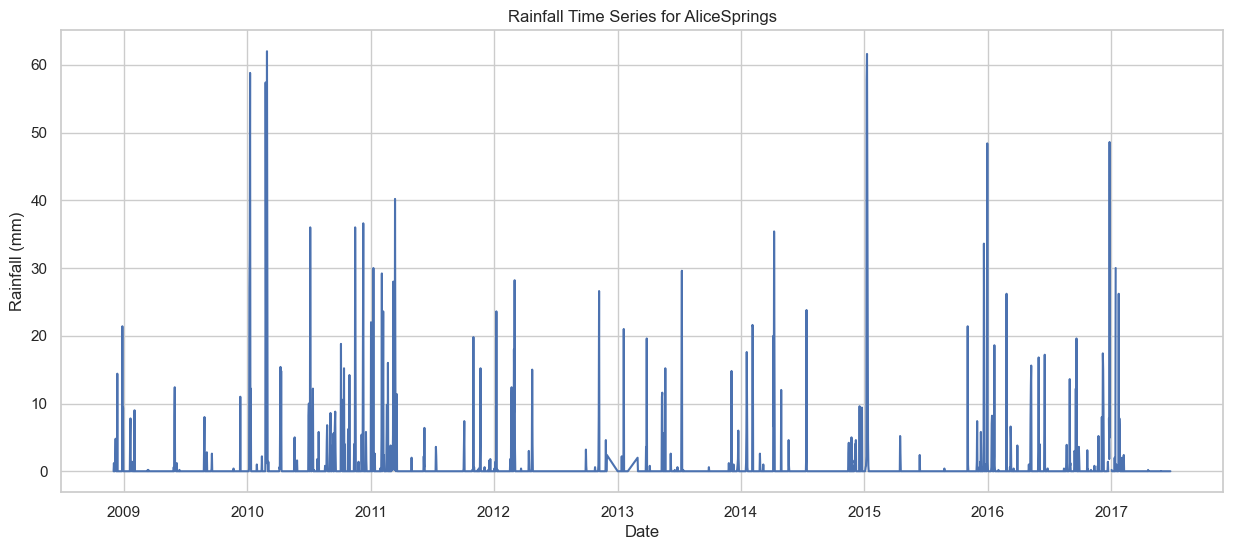

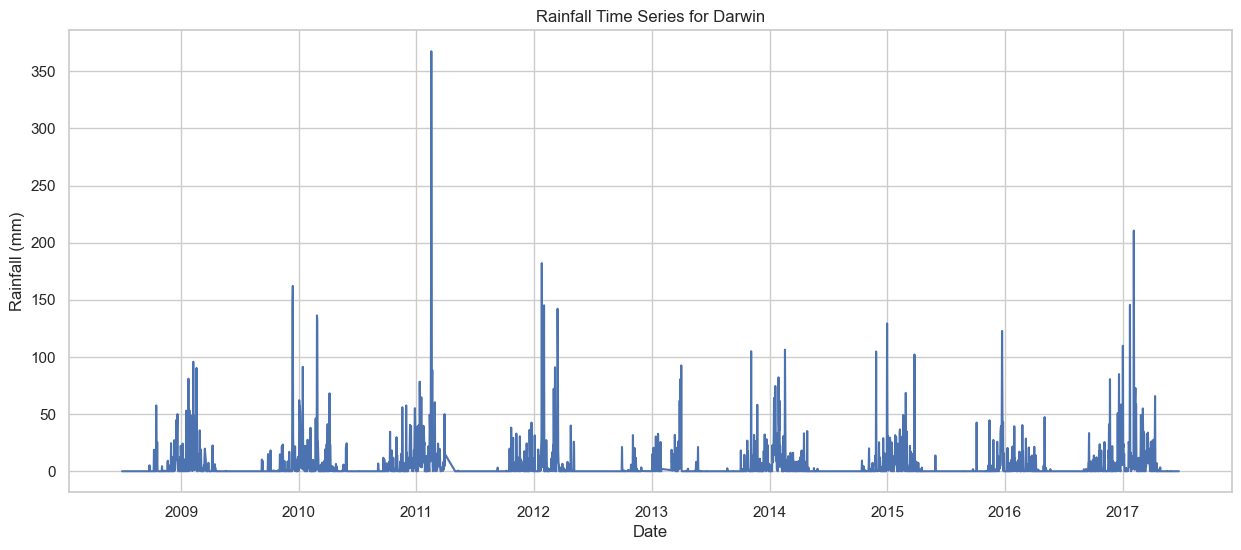

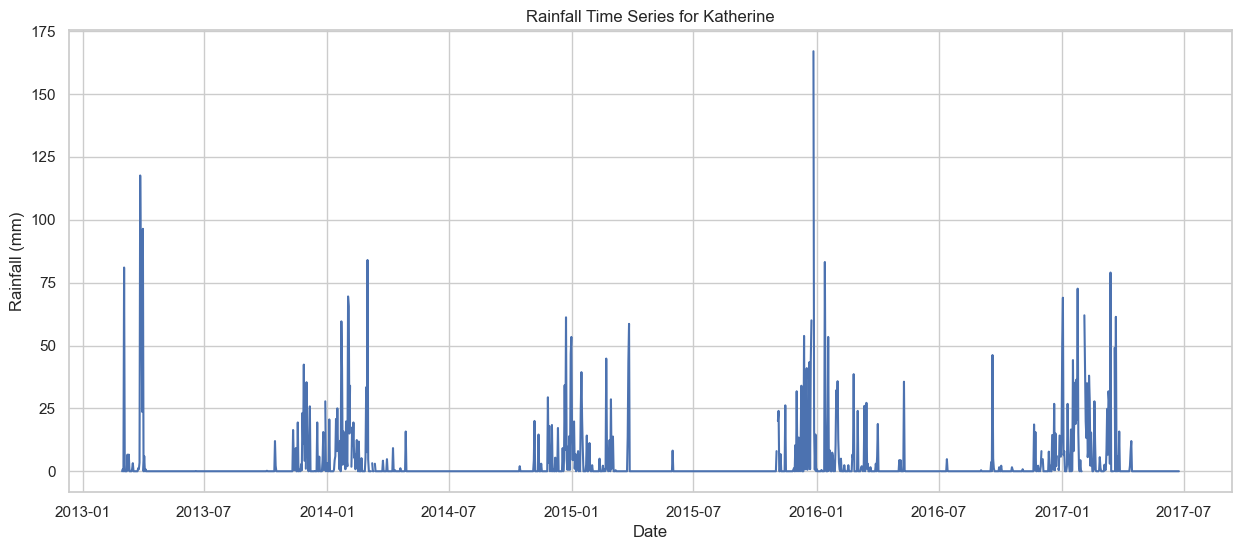

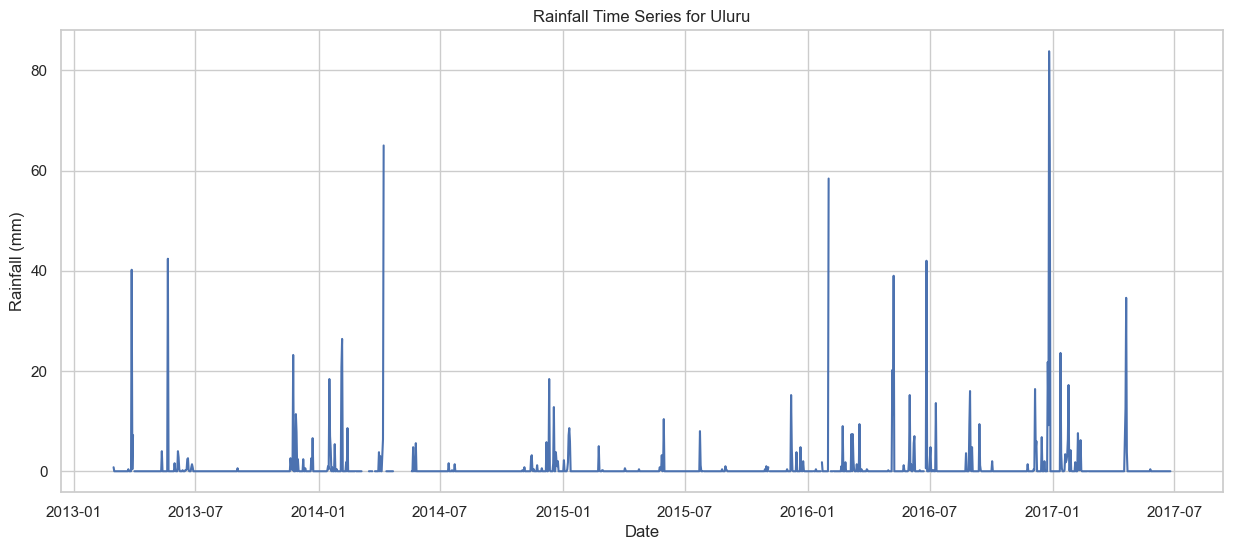

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
regions = df['Location'].unique()

# Plotting rainfall for each region
for region in regions:
    region_data = df[df['Location'] == region]
    
    # Plotting
    plt.figure(figsize=(15, 6))
    plt.plot(pd.to_datetime(region_data['Date']), region_data['Rainfall'])
    plt.title(f'Rainfall Time Series for {region}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.grid(True)
    plt.show()


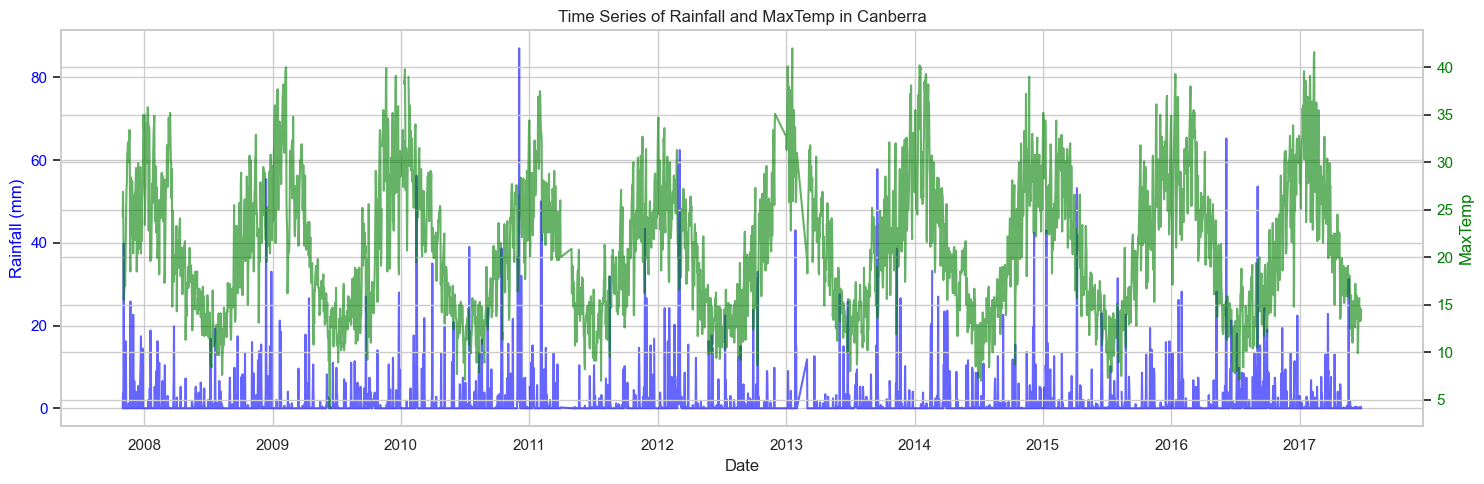

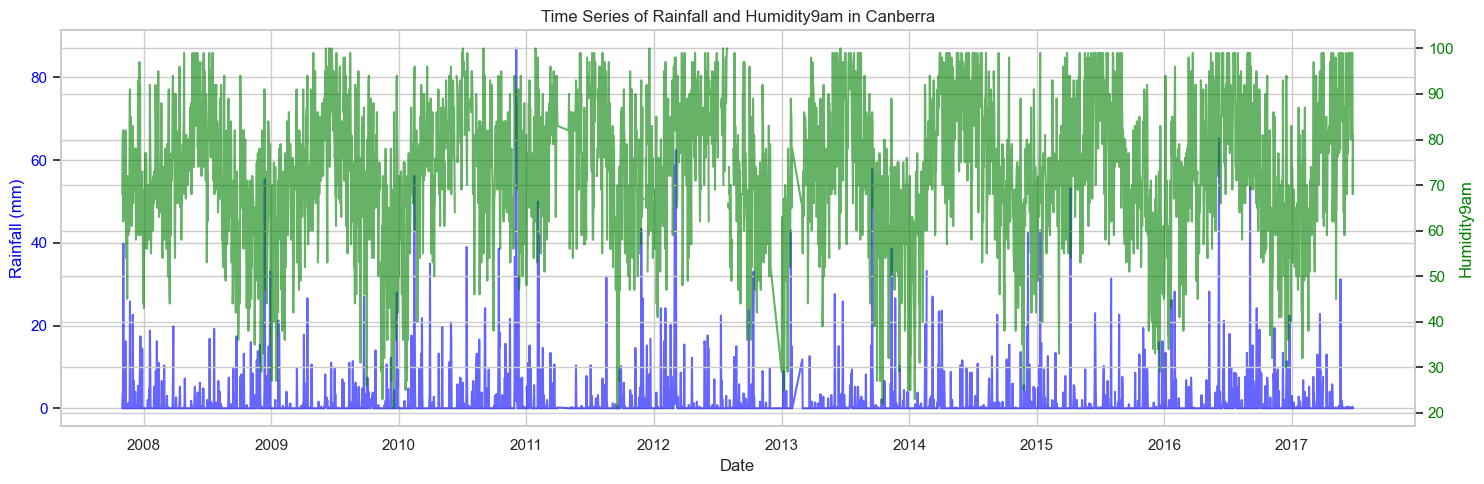

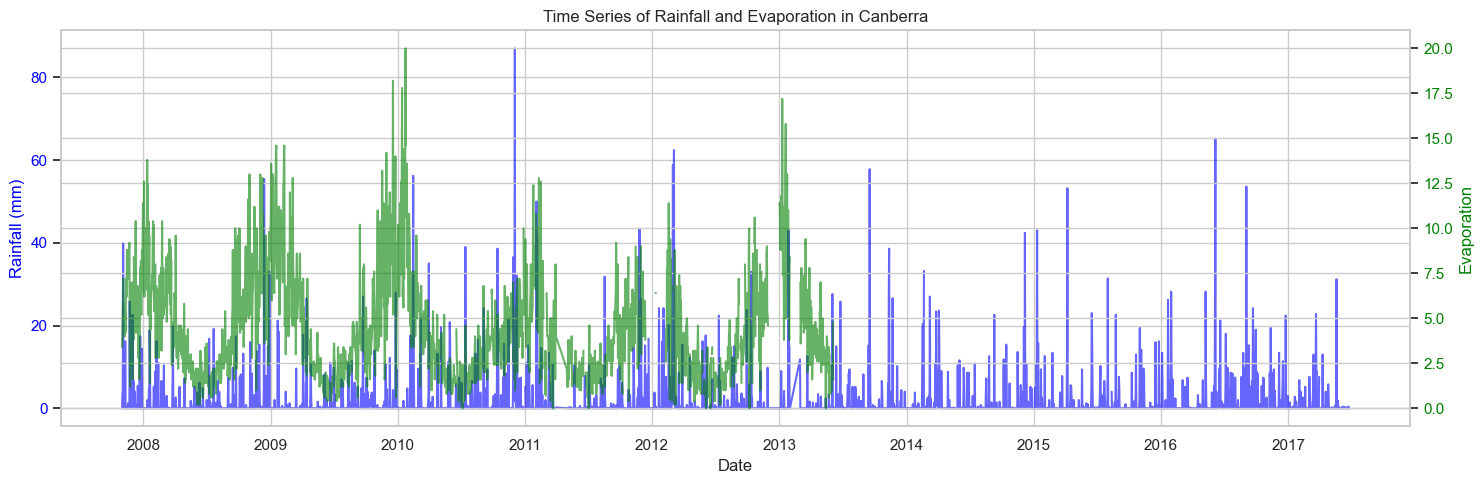

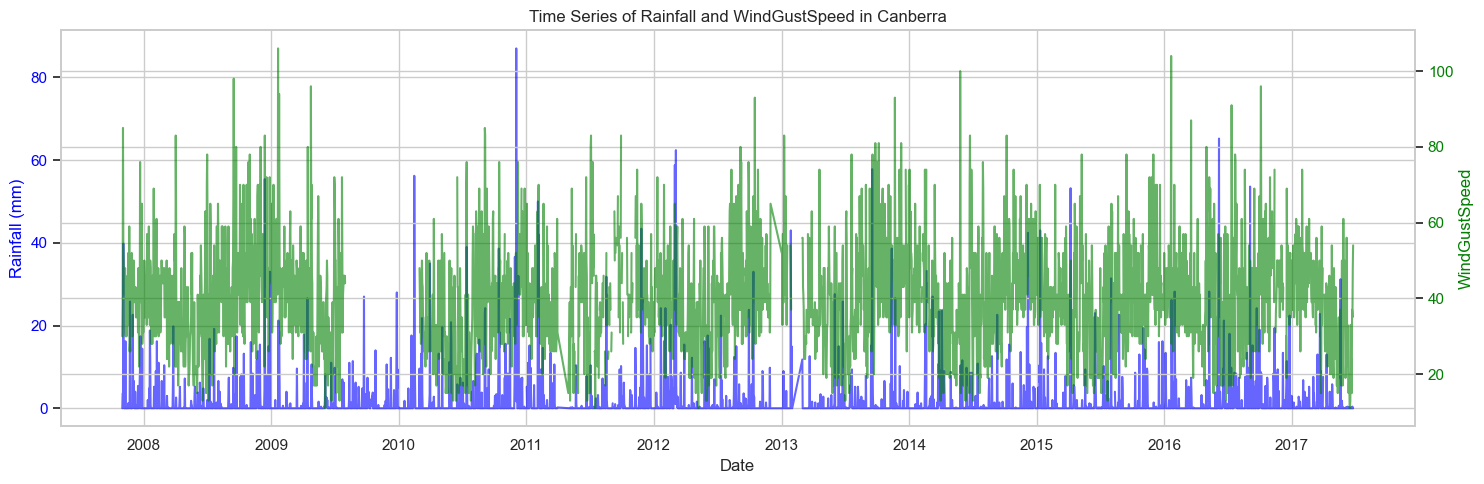

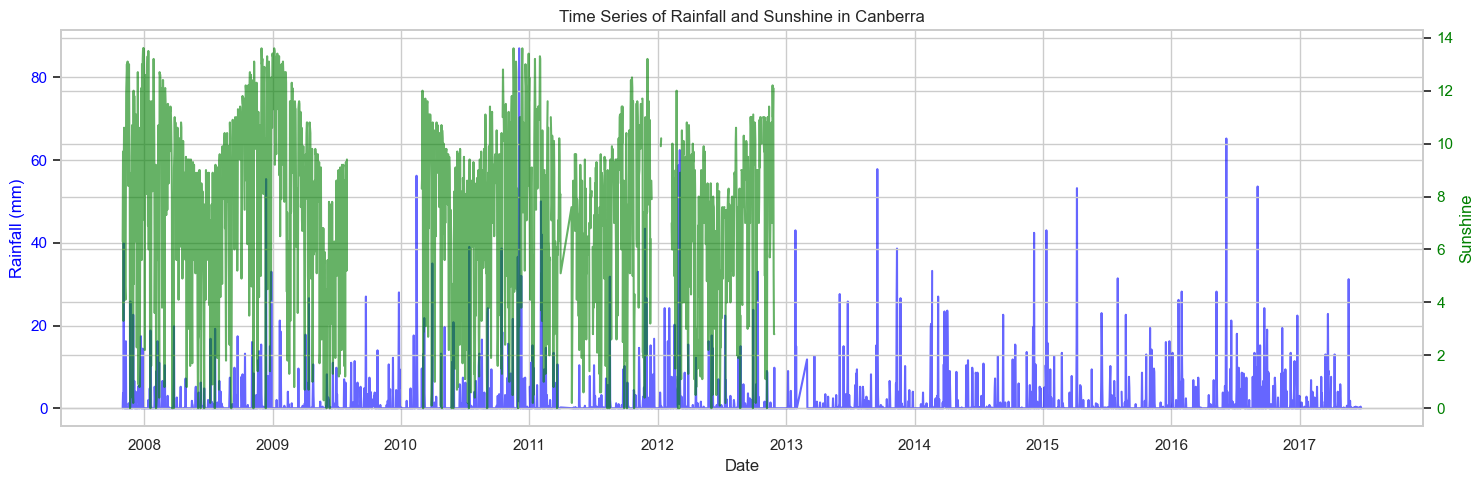

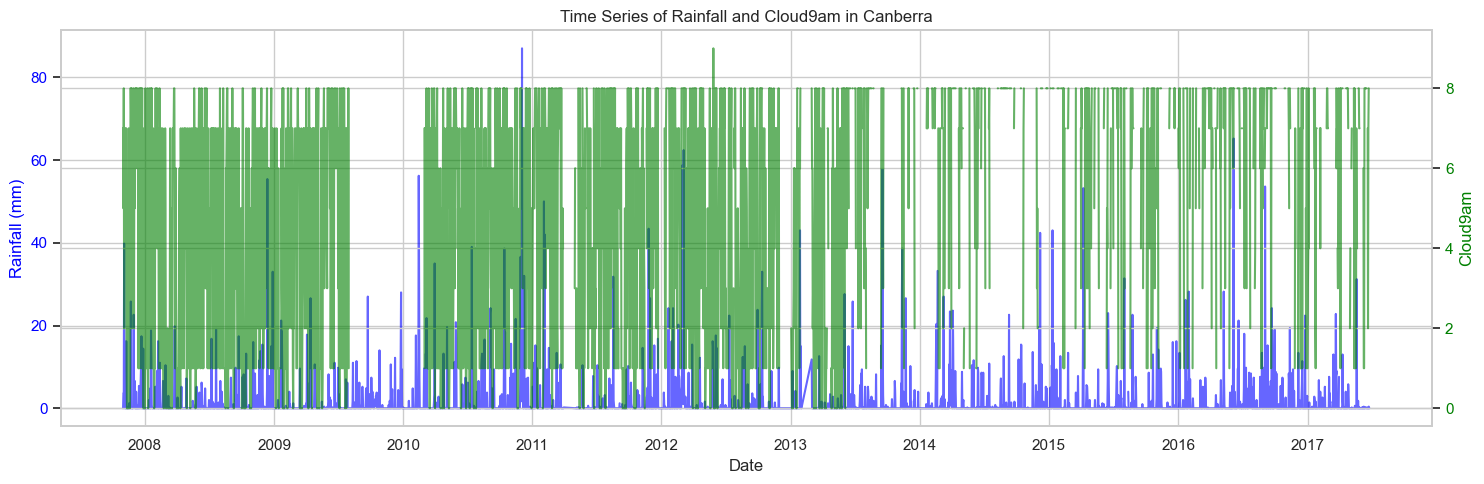

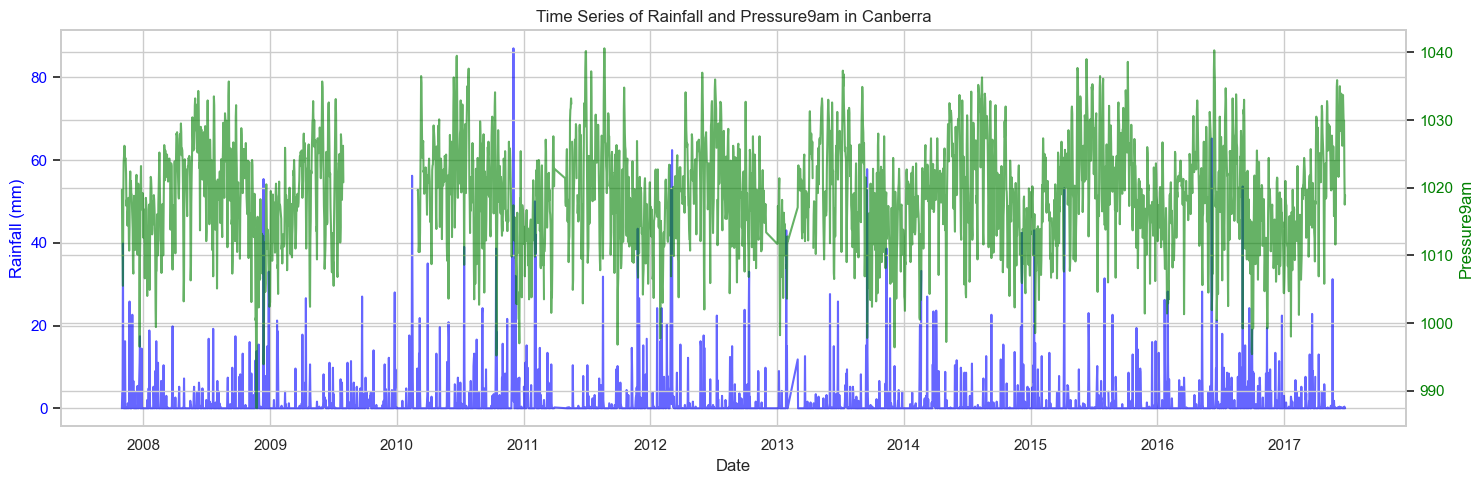

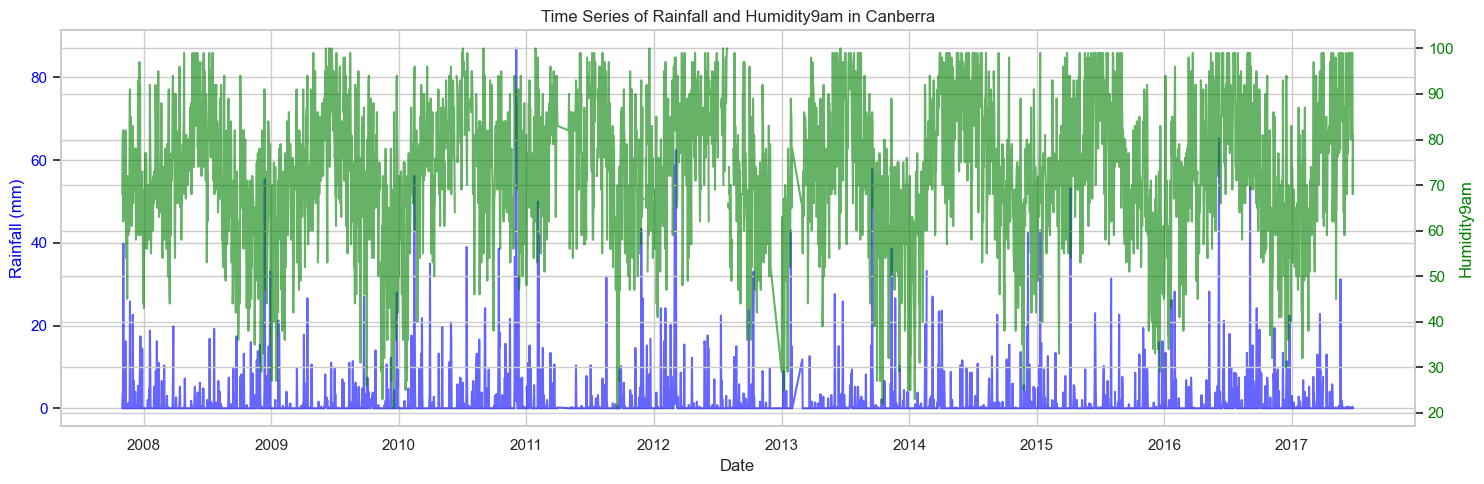

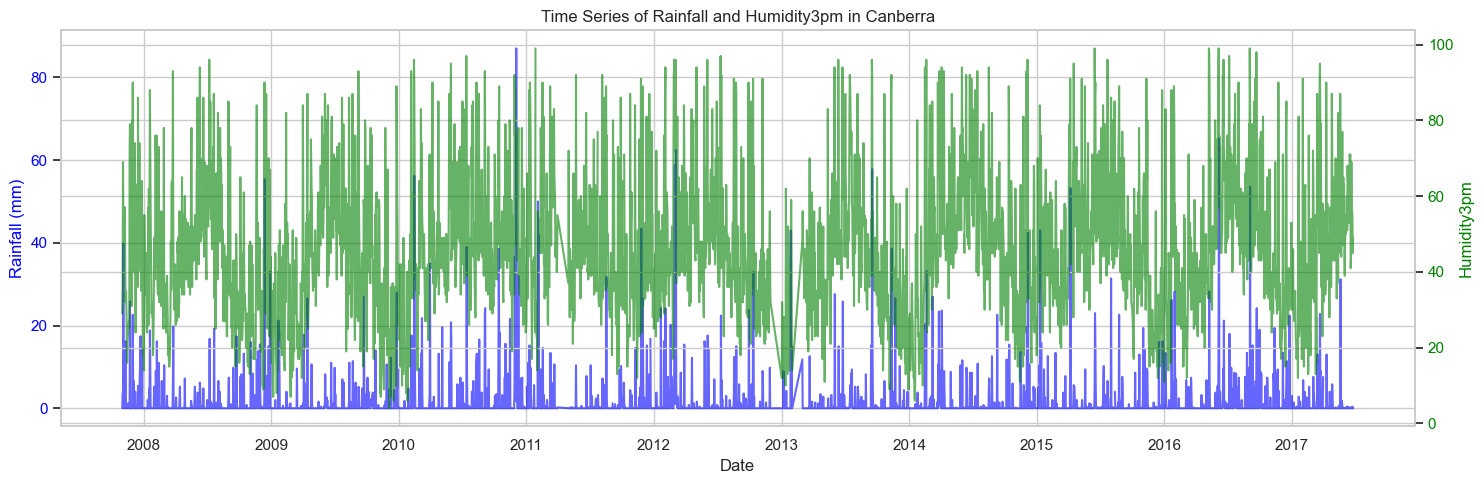

In [10]:
location_data = df[df['Location'] == 'Canberra']
location_data.head()
columns_to_compare = ['MaxTemp', 'Humidity9am', 'Evaporation', 'WindGustSpeed', 'Sunshine', 'Cloud9am', 'Pressure9am','Humidity9am','Humidity3pm']
# Plotting time series relationships for each column
for column in columns_to_compare:
    fig, ax1 = plt.subplots(figsize=(15, 5))
    
    # Plotting Rainfall data
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Rainfall (mm)', color='blue')
    ax1.plot(location_data['Date'], location_data['Rainfall'], color='blue', alpha=0.6, label='Rainfall')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Creating a second y-axis to plot the other column
    ax2 = ax1.twinx()
    ax2.set_ylabel(column, color='green')
    ax2.plot(location_data['Date'], location_data[column], color='green', alpha=0.6, label=column)
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Title and show plot
    plt.title(f"Time Series of Rainfall and {column} in Canberra")
    plt.tight_layout()
    plt.show()

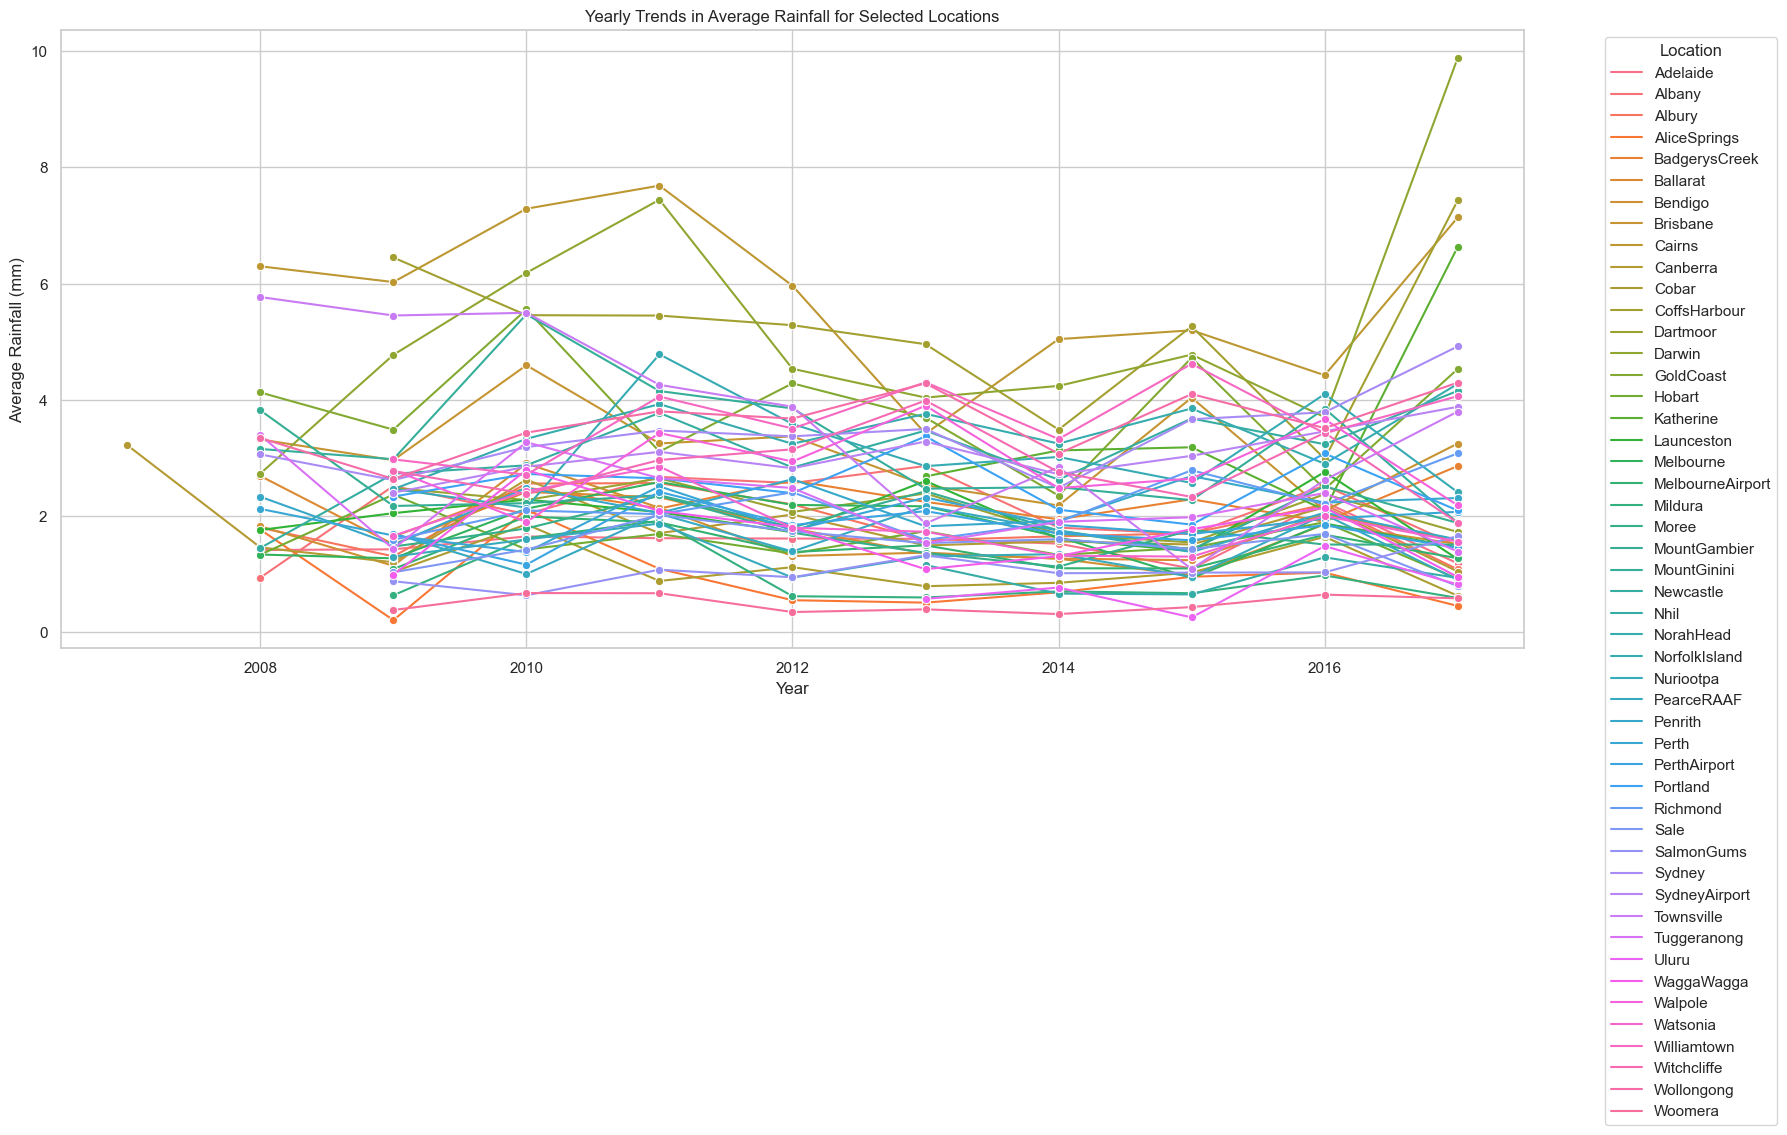

In [11]:
# Calculate the average rainfall by year for each selected location
yearly_avg_rainfall = df.groupby(['Location', 'Year'])['Rainfall'].mean().reset_index()

# Plotting
plt.figure(figsize=(18, 10))
sns.lineplot(x='Year', y='Rainfall', hue='Location', data=yearly_avg_rainfall, marker='o')
plt.title('Yearly Trends in Average Rainfall for Selected Locations')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations**

**Variable Trends:** Different locations show different trends. For example, Cairns appears to have experienced some years with notably higher average rainfall, while other locations like Sydney and Perth seem to have more stable yearly averages.

**Short-Term Fluctuations:** There are fluctuations in the average rainfall for most locations, indicating that a single year's increase or decrease does not necessarily represent a long-term trend.

**Data Sparsity:** For some locations, the data is sparse in the earlier years, which could affect the reliability of the trend for those years.


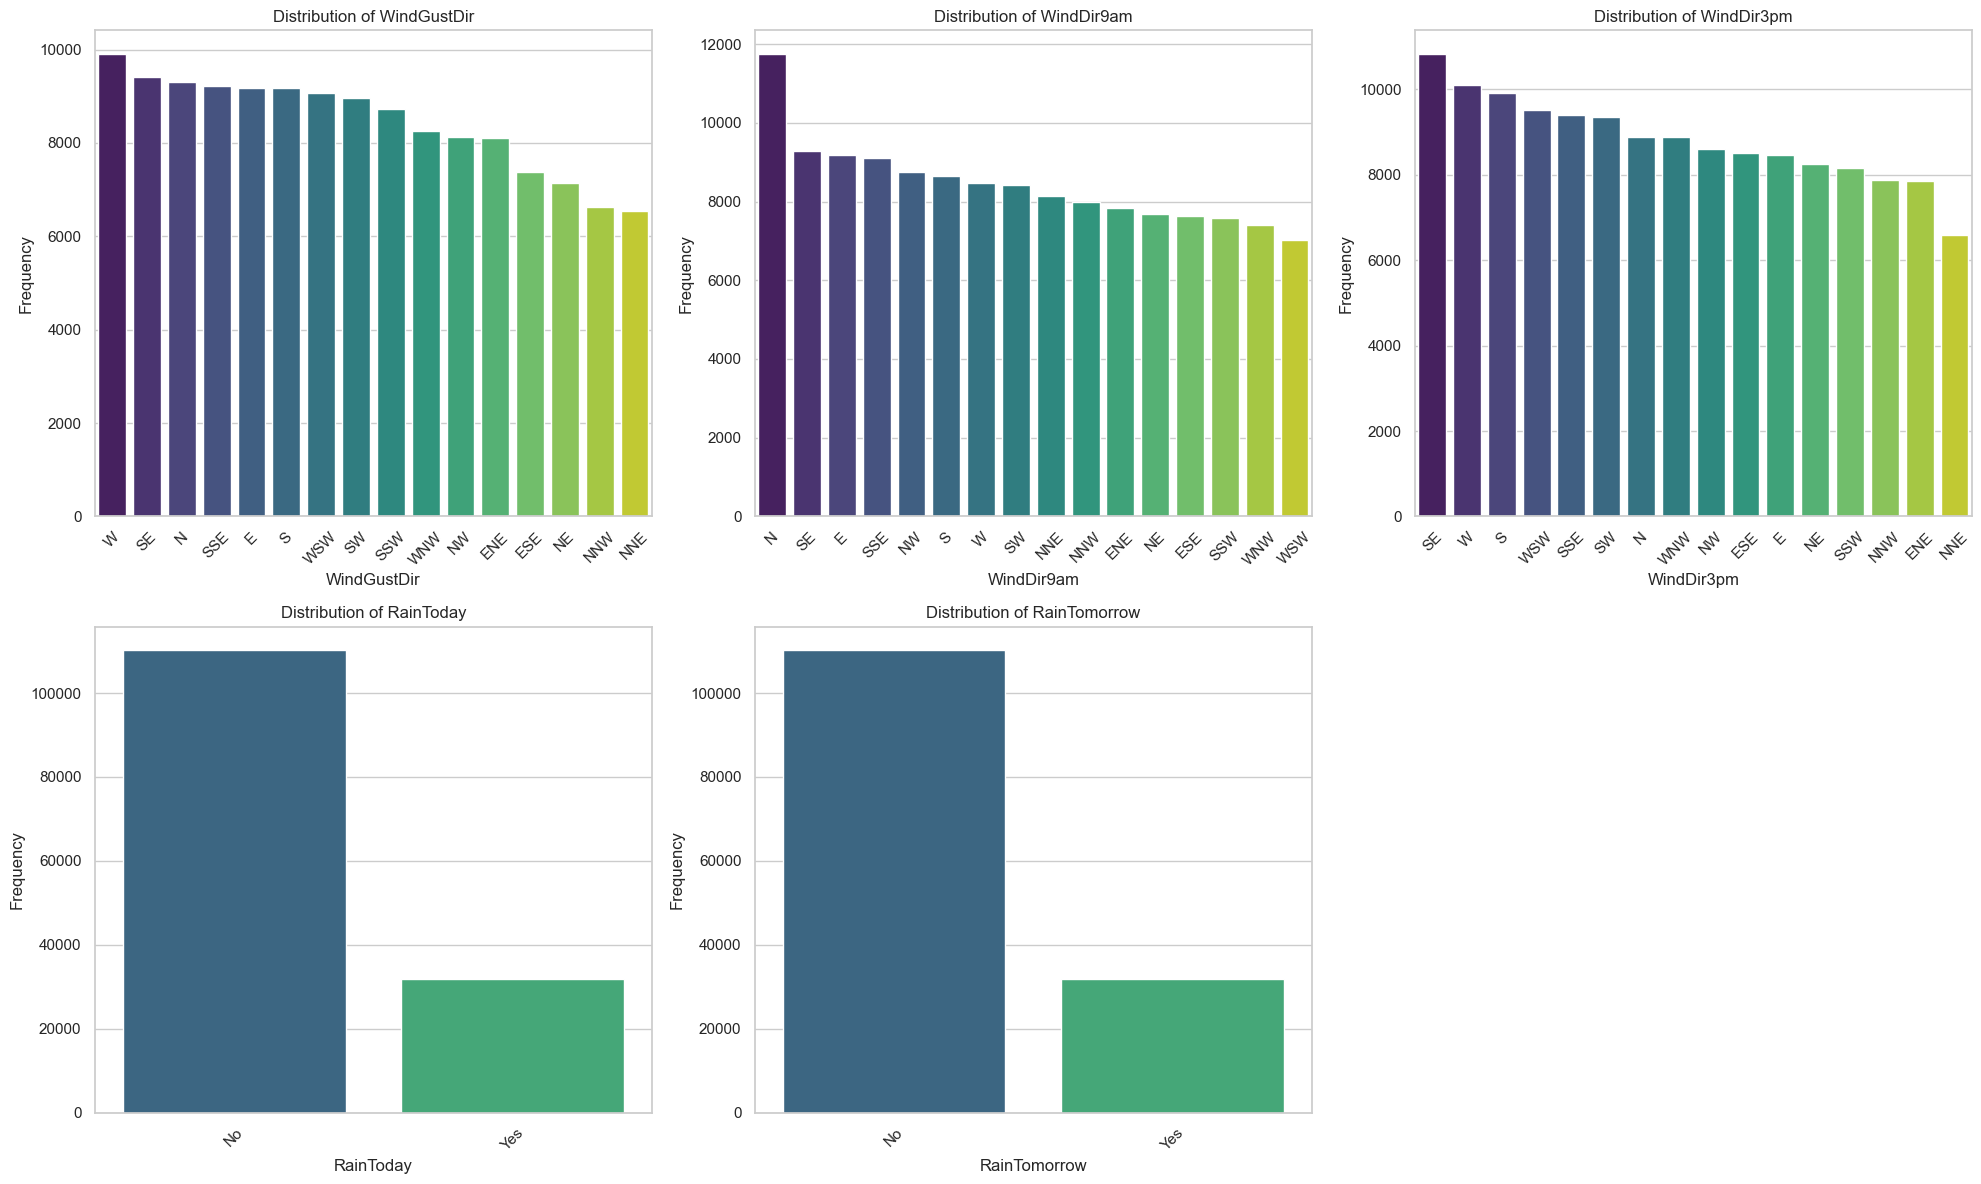

In [12]:
# Initialize the figure
plt.figure(figsize=(20, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Create subplots for each column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

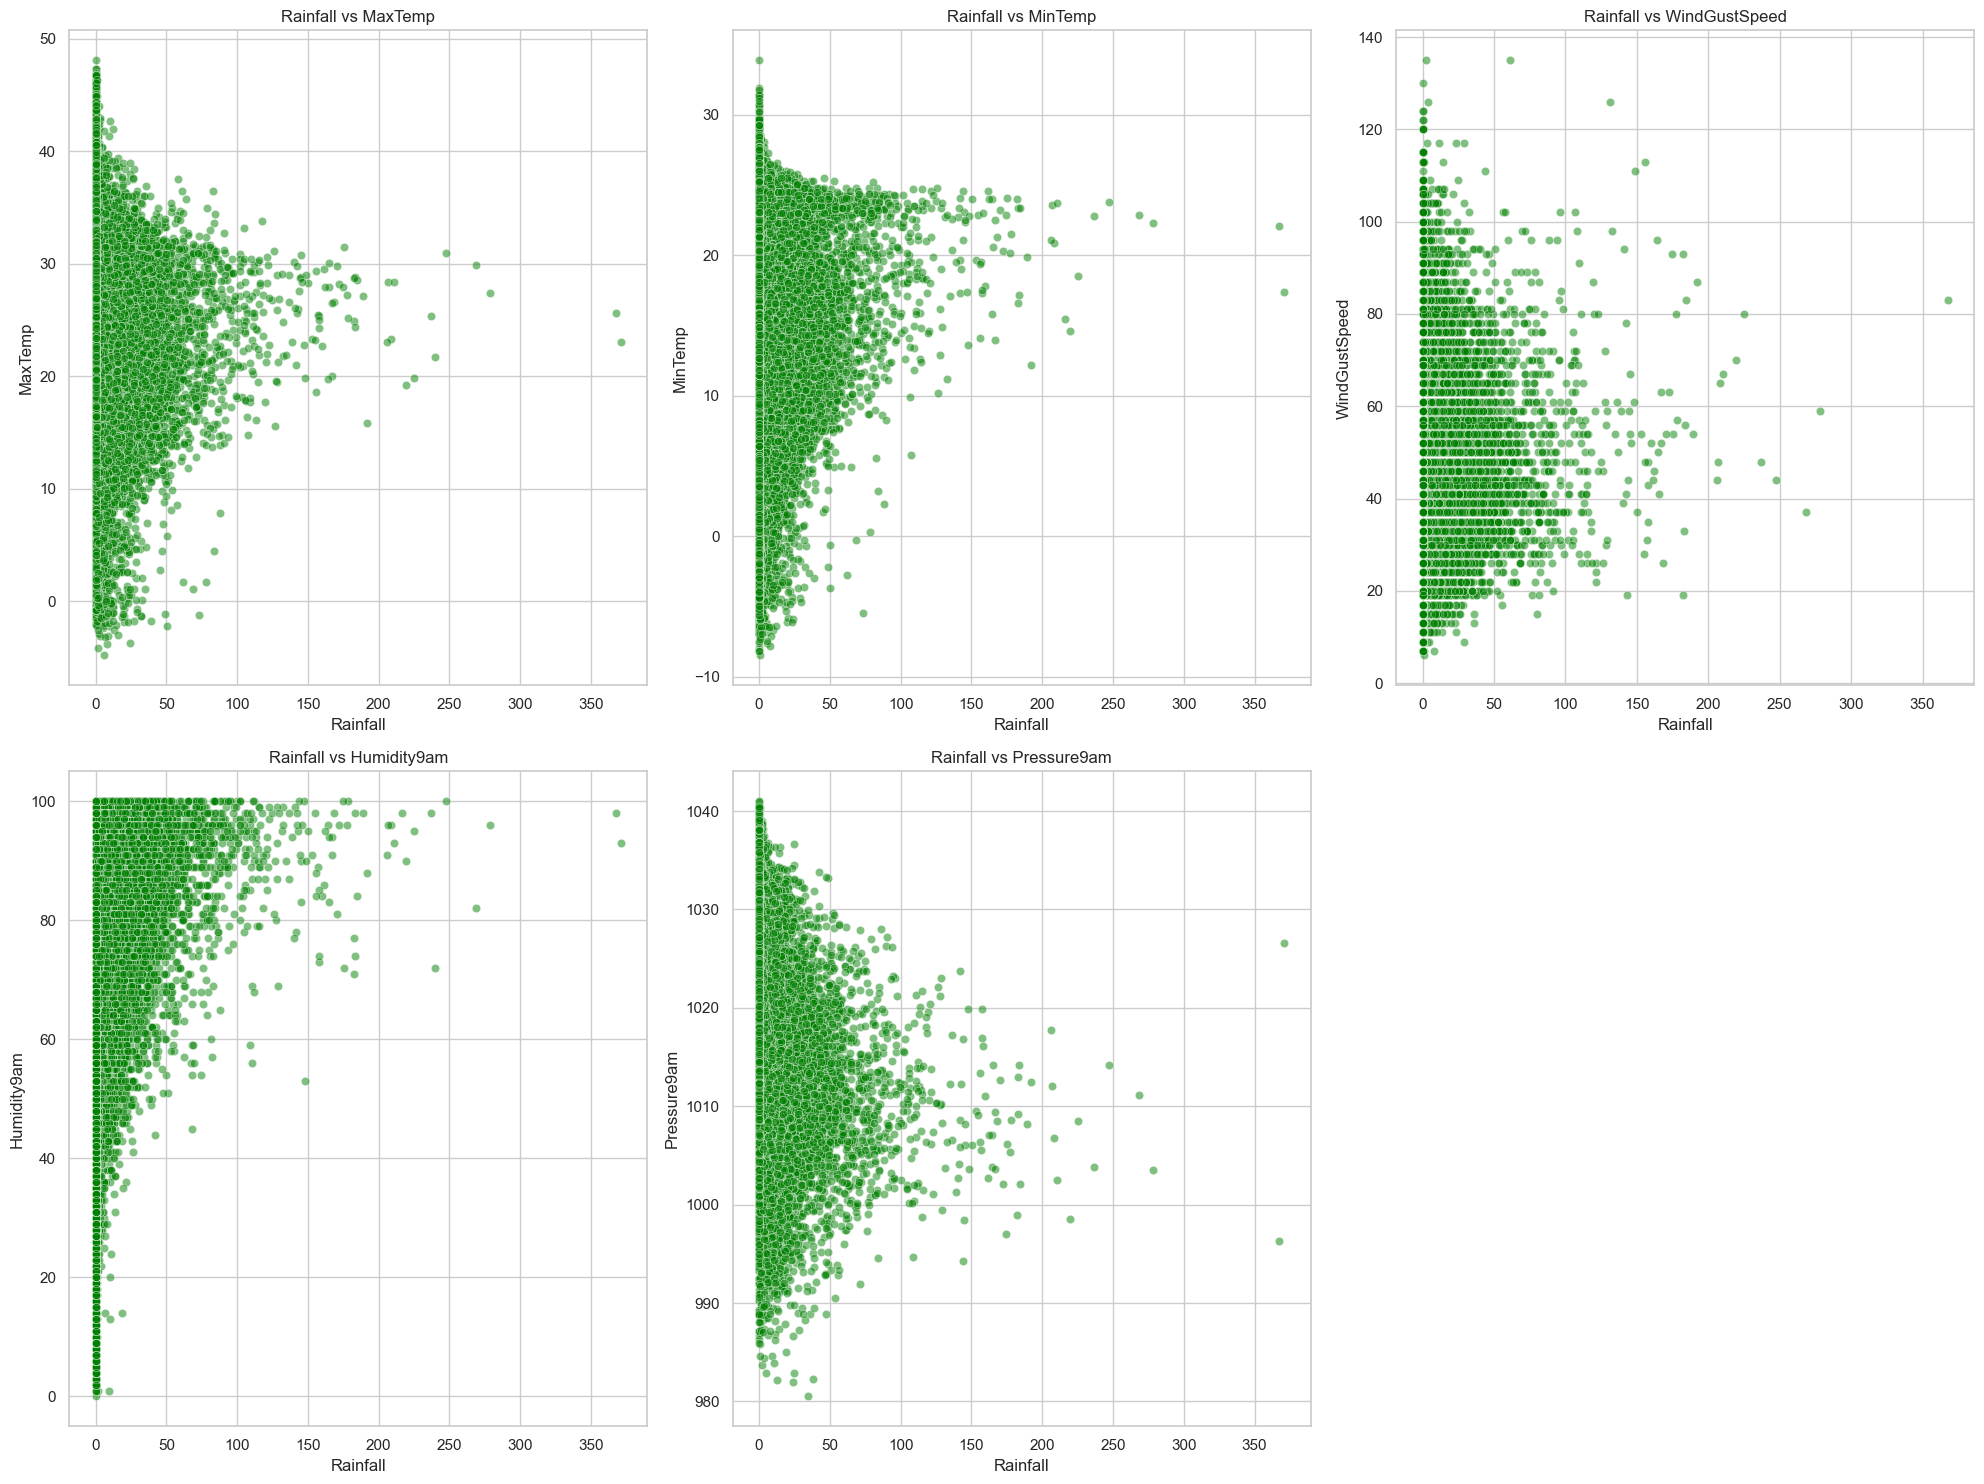

In [13]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to compare with 'Rainfall'
features_to_compare_with_rainfall = ['MaxTemp', 'MinTemp', 'WindGustSpeed', 'Humidity9am', 'Pressure9am']

# Create subplots for each feature to compare with 'Rainfall'
for i, feature in enumerate(features_to_compare_with_rainfall, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Rainfall', y=feature, alpha=0.5, color='green')
    plt.title(f'Rainfall vs {feature}')
    plt.xlabel('Rainfall')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

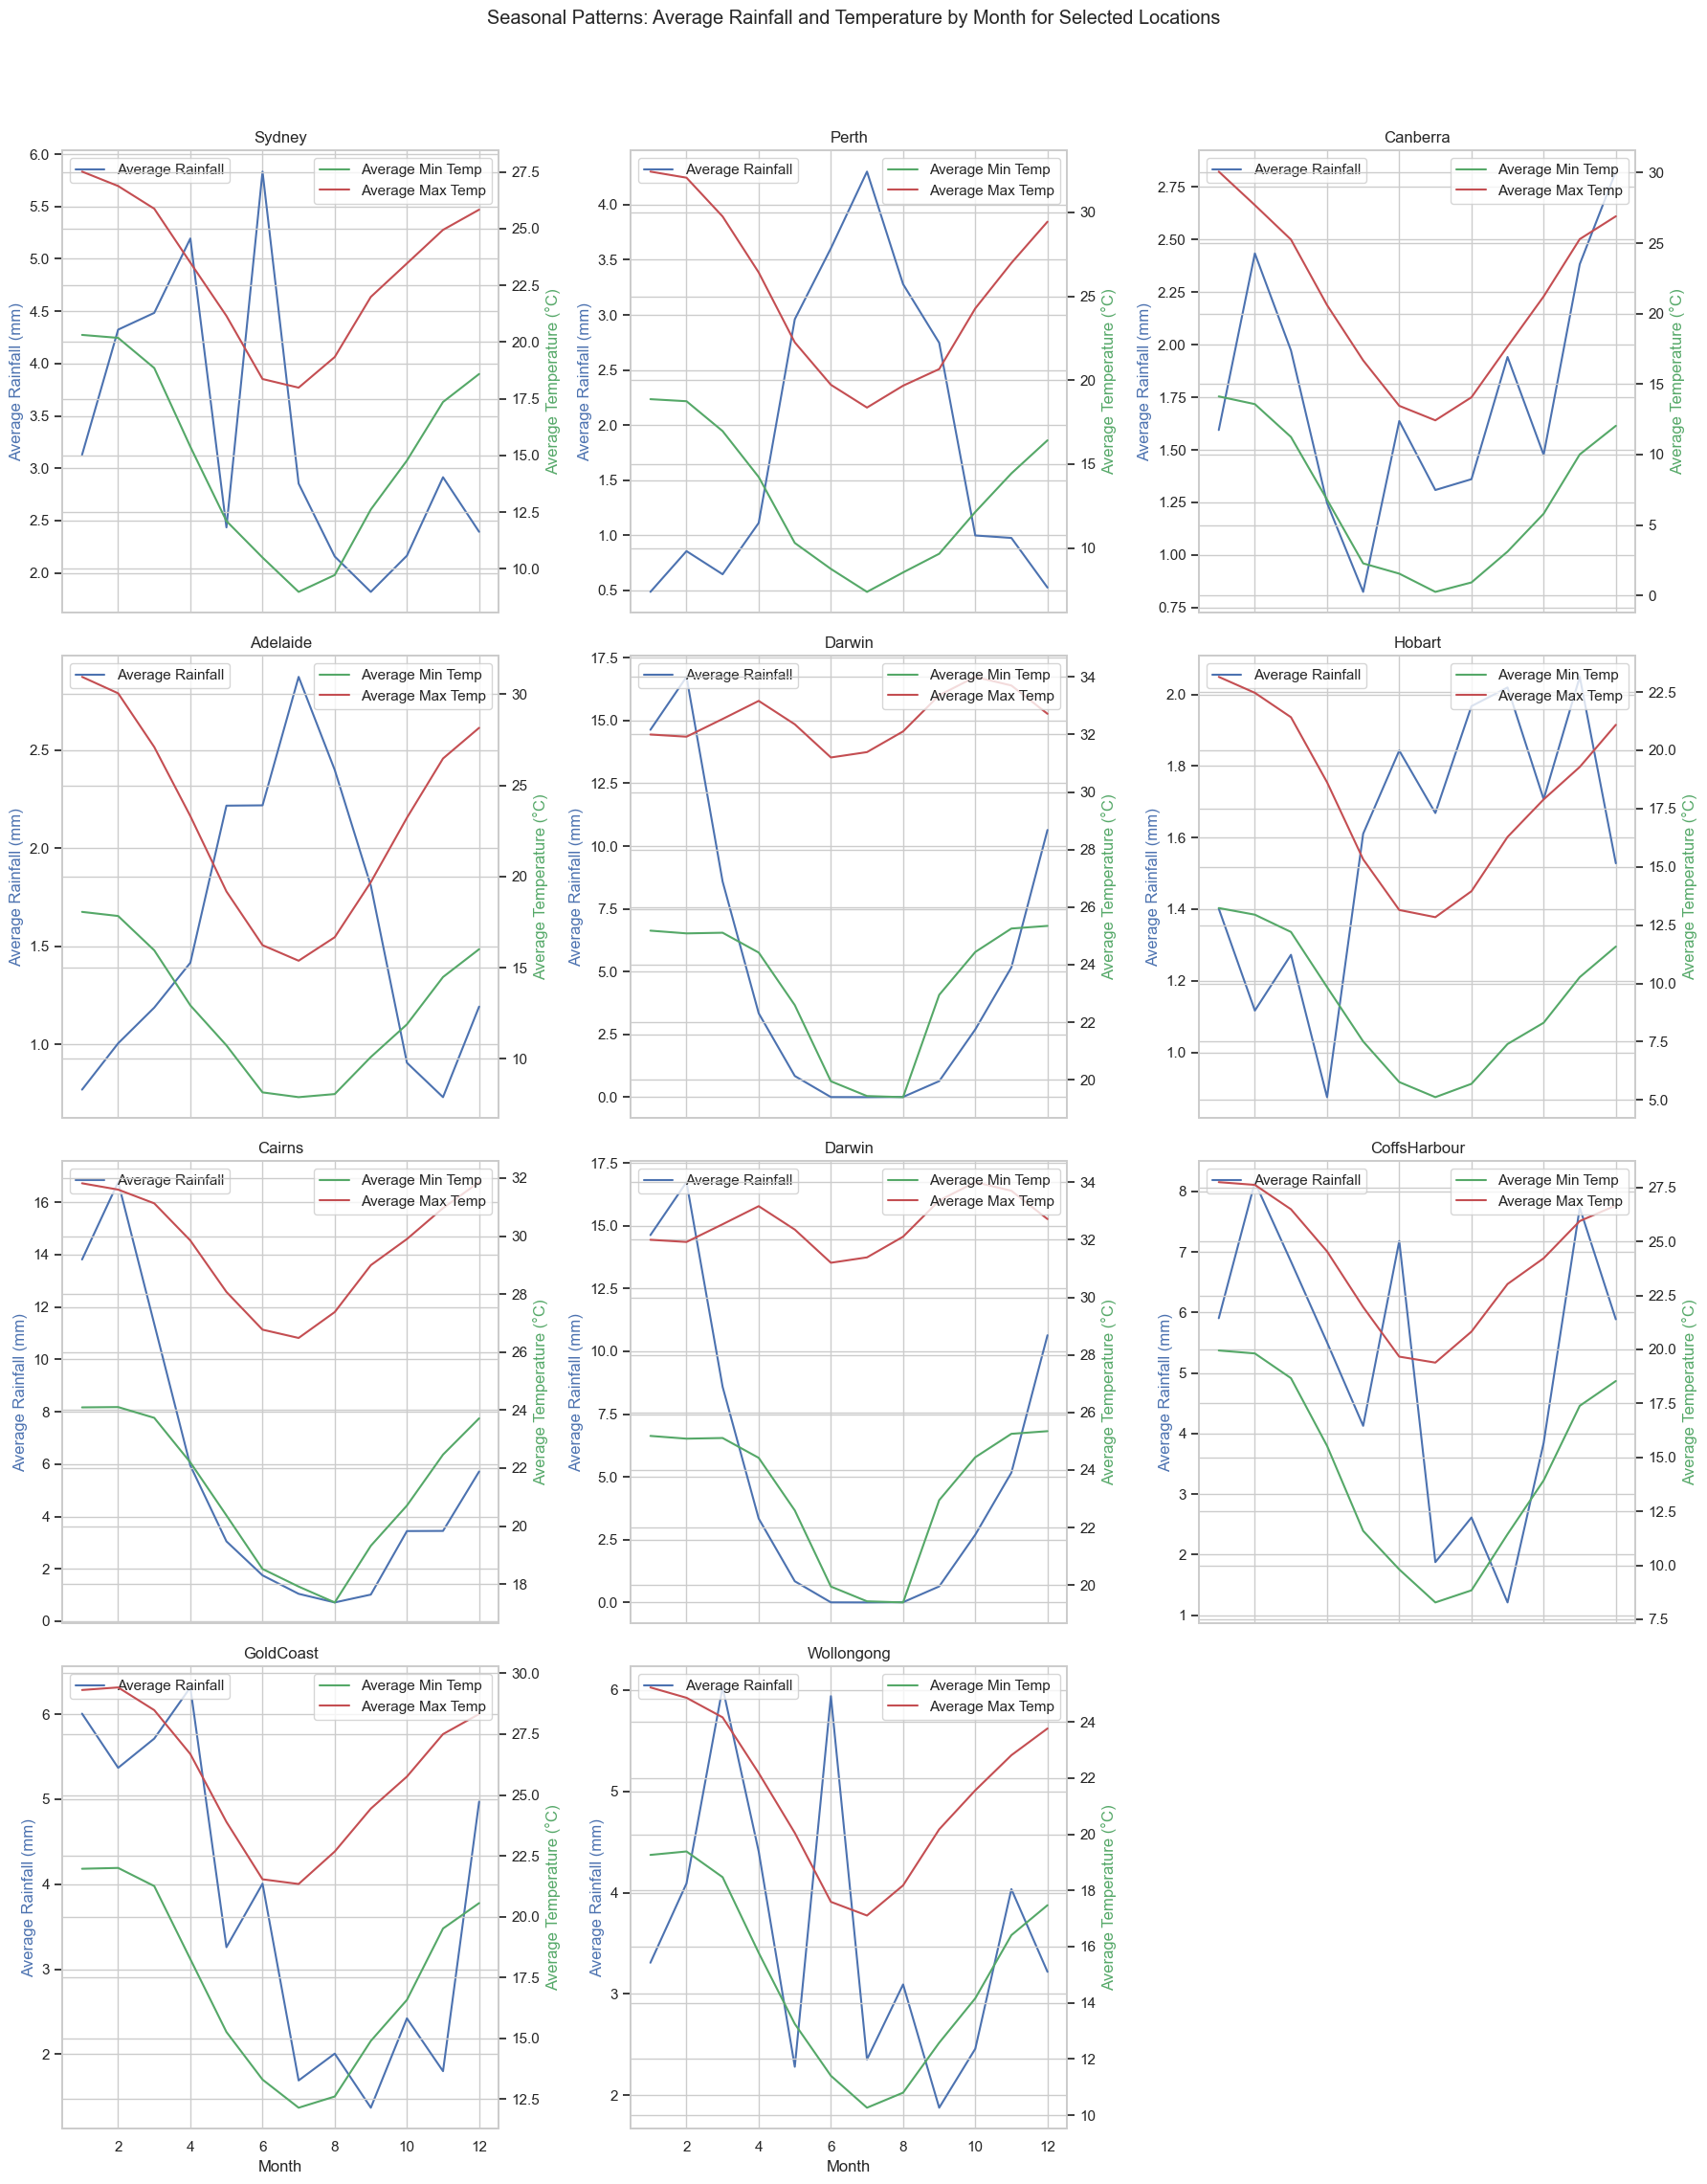

In [14]:
import math

# Update the list of major cities and top locations to consider for the new plot
major_cities = ['Sydney', 'Perth', 'Canberra', 'Adelaide', 'Darwin', 'Hobart']
top_locations = rainfall_by_location['Location'].head(5).tolist()
locations_to_consider = major_cities + top_locations

# Filter the dataset to only include these locations
df_filtered = df[df['Location'].isin(locations_to_consider)]

# Calculate the average rainfall and temperature by month for each selected location
monthly_avg_by_location = df_filtered.groupby(['Location', 'Month']).agg({
    'Rainfall': 'mean',
    'MinTemp': 'mean',
    'MaxTemp': 'mean'
}).reset_index()

# Determine the number of rows and columns for the subplots
num_locations = len(locations_to_consider)
num_cols = 3  # You can change this to fit your layout preference
num_rows = math.ceil(num_locations / num_cols)

# Plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6), sharex=True, sharey=False)
fig.suptitle('Seasonal Patterns: Average Rainfall and Temperature by Month for Selected Locations')

# Flatten the axes for easier iteration
if axes.ndim > 1:
    axes = axes.flatten()

# Plot data for each location
for i, location in enumerate(locations_to_consider):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    location_data = monthly_avg_by_location[monthly_avg_by_location['Location'] == location]
    
    sns.lineplot(x='Month', y='Rainfall', data=location_data, ax=ax1, label='Average Rainfall', color='b')
    sns.lineplot(x='Month', y='MinTemp', data=location_data, ax=ax2, label='Average Min Temp', color='g')
    sns.lineplot(x='Month', y='MaxTemp', data=location_data, ax=ax2, label='Average Max Temp', color='r')
    
    ax1.set_title(location)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Rainfall (mm)', color='b')
    ax2.set_ylabel('Average Temperature (°C)', color='g')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Remove empty subplots
for i in range(num_locations, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
